In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO

In [2]:
z = zipfile.ZipFile('Data/time-series.zip')

df_list = []
for i in z.infolist():
    df_list.append(pd.read_csv(StringIO(z.read(i.filename).decode('utf_8'))))

### plot

In [3]:
df_list[2]

timestamp   value  label
0       1491041280  2010.0      0
1       1491041340  1912.0      0
2       1491041400  1888.0      0
3       1491041460  1975.0      0
4       1491041520  2022.0      0
...            ...     ...    ...
129448  1498960980  2600.0      0
129449  1498961040  2525.0      0
129450  1498961100  2451.0      0
129451  1498961160  2475.0      0
129452  1498961220  2651.0      0

[129453 rows x 3 columns]

shape :  (147668, 3)


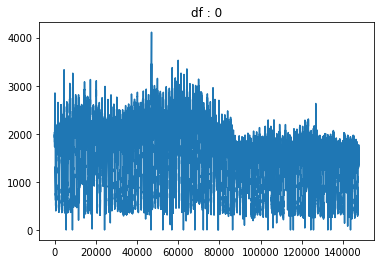

shape :  (146228, 3)


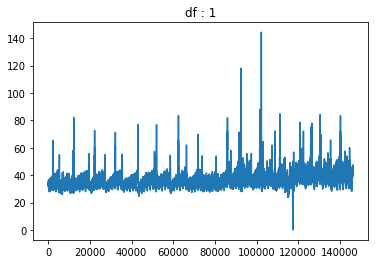

shape :  (129453, 3)


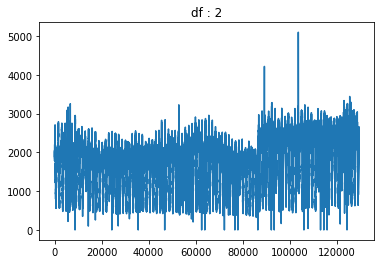

shape :  (1680, 3)


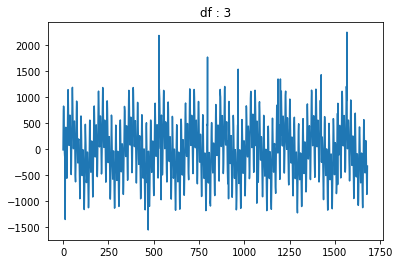

shape :  (1680, 3)


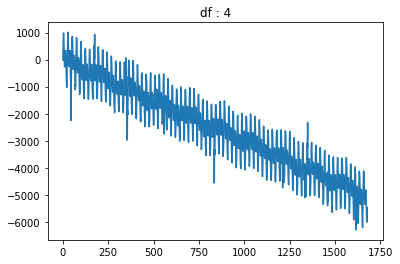

shape :  (1680, 3)


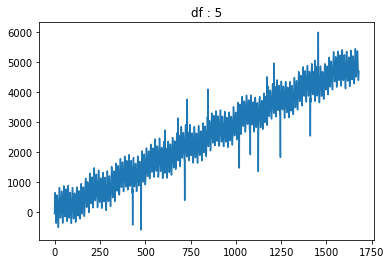

shape :  (1680, 3)


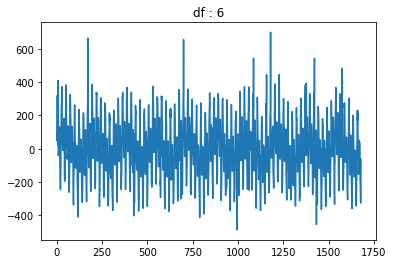

shape :  (1680, 3)


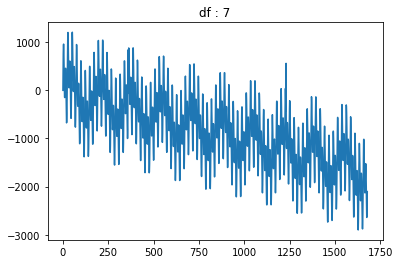

shape :  (1680, 3)


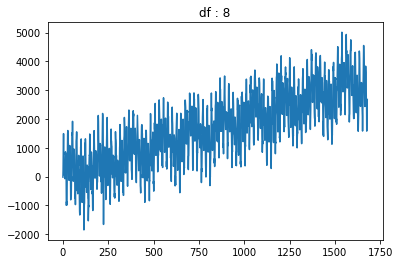

shape :  (1680, 3)


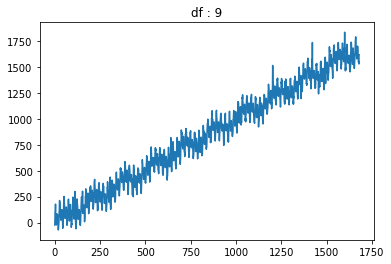

shape :  (1680, 3)


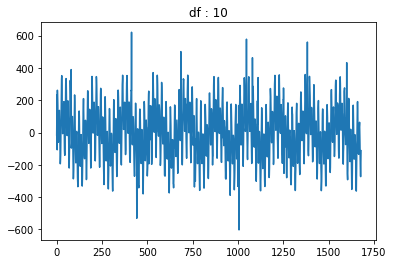

shape :  (1680, 3)


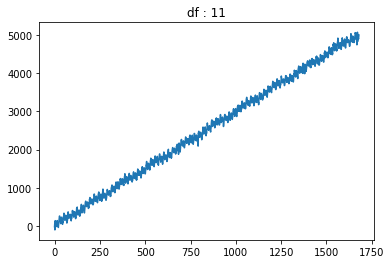

shape :  (1680, 3)


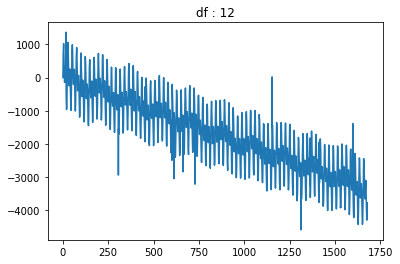

shape :  (1680, 3)


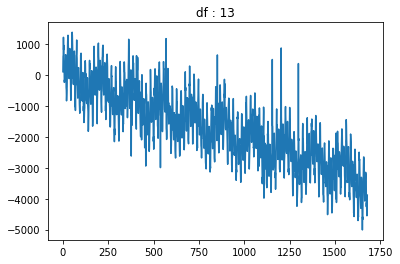

shape :  (1680, 3)


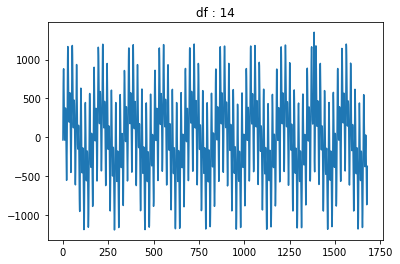

shape :  (1680, 3)


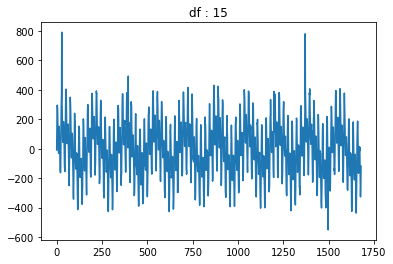

shape :  (1680, 3)


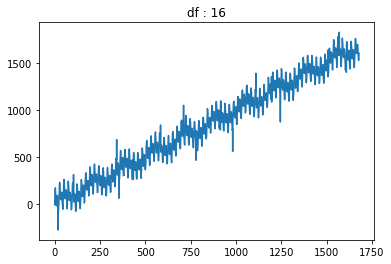

shape :  (1680, 3)


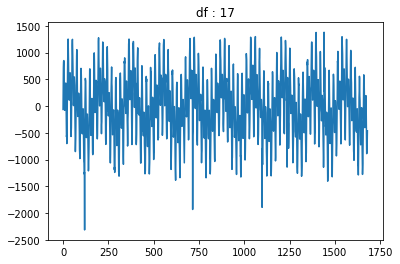

shape :  (1680, 3)


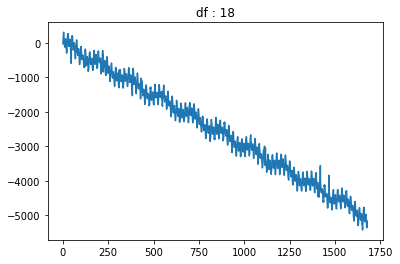

shape :  (1680, 3)


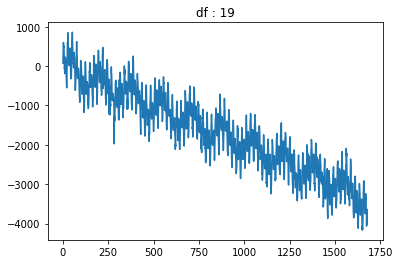

shape :  (1680, 3)


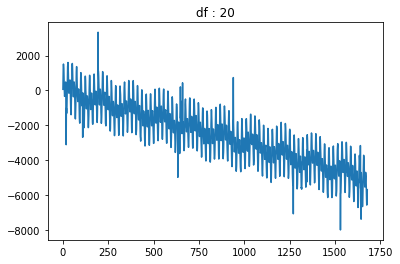

shape :  (1680, 3)


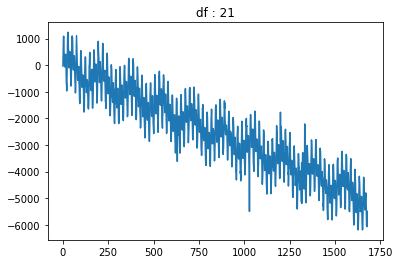

shape :  (1680, 3)


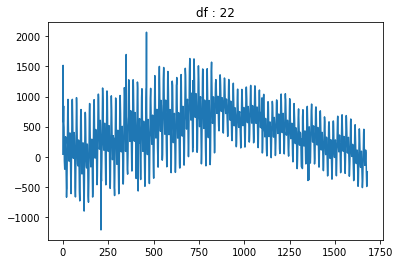

shape :  (1680, 3)


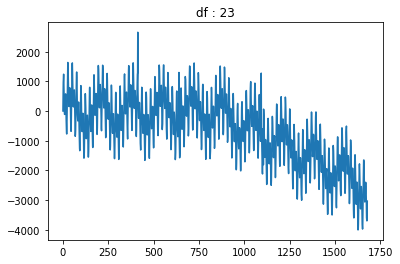

shape :  (1680, 3)


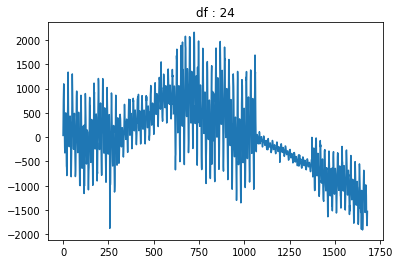

shape :  (1680, 3)


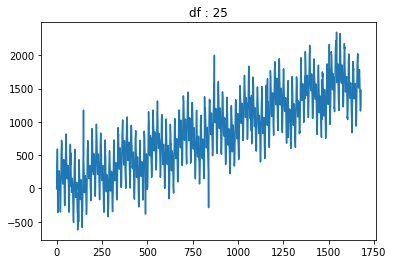

shape :  (1680, 3)


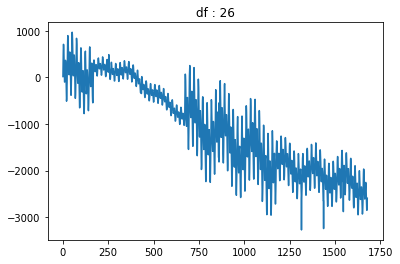

shape :  (1680, 3)


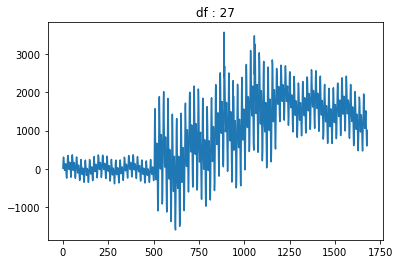

shape :  (1680, 3)


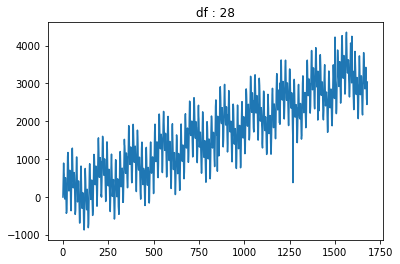

shape :  (1680, 3)


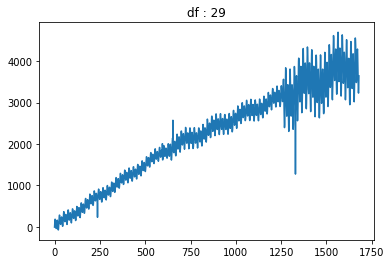

shape :  (1680, 3)


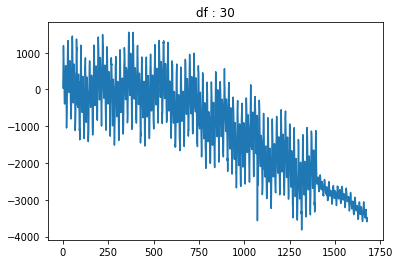

shape :  (1680, 3)


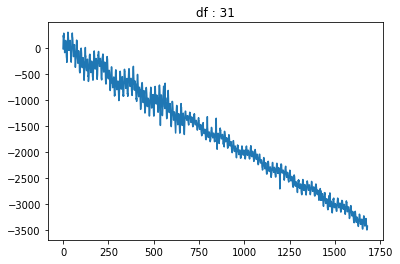

shape :  (1680, 3)


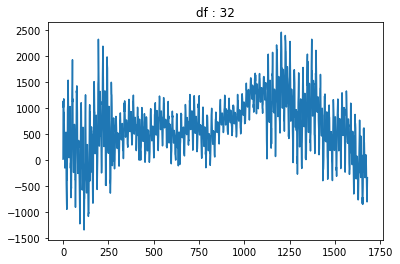

shape :  (1680, 3)


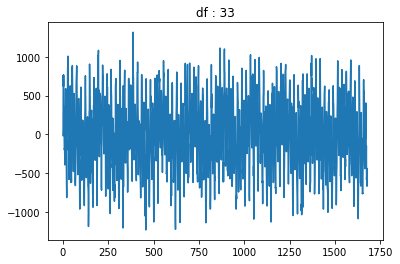

shape :  (1680, 3)


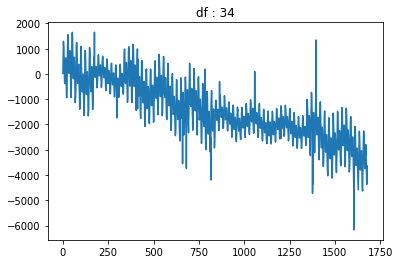

shape :  (1680, 3)


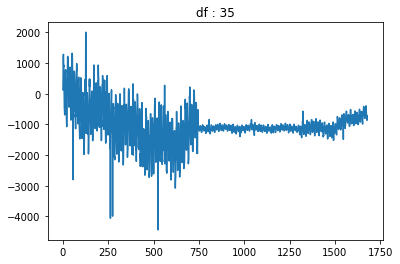

shape :  (1680, 3)


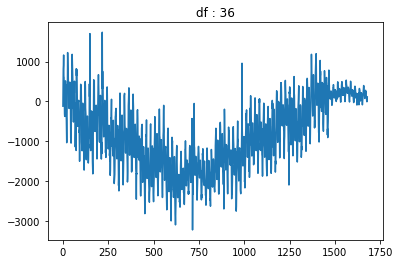

shape :  (1680, 3)


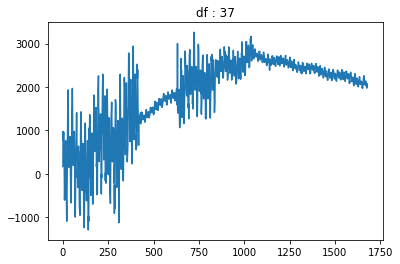

shape :  (1680, 3)


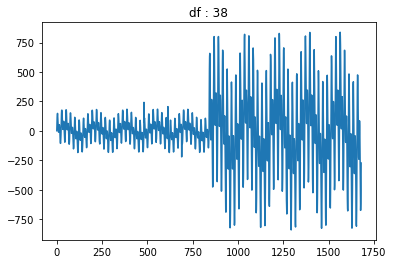

shape :  (1680, 3)


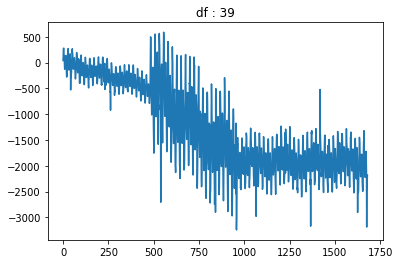

shape :  (1680, 3)


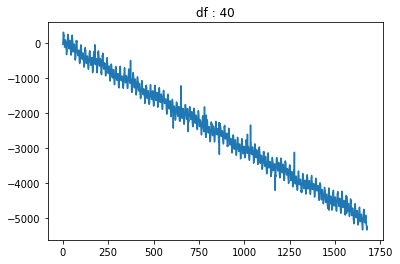

shape :  (1680, 3)


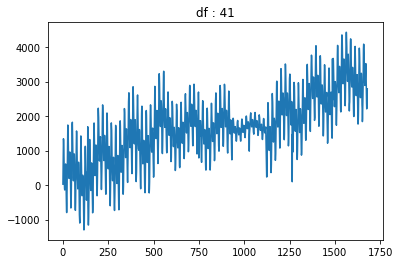

shape :  (128679, 3)


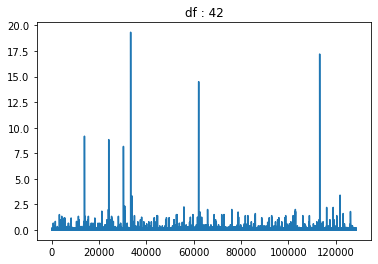

shape :  (8863, 3)


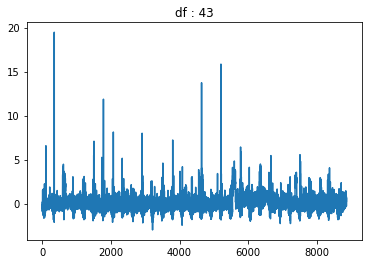

shape :  (146255, 3)


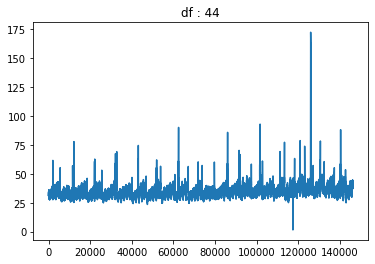

shape :  (147024, 3)


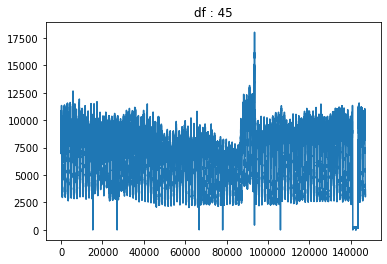

shape :  (1461, 3)


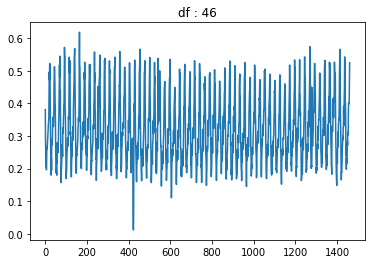

shape :  (1424, 3)


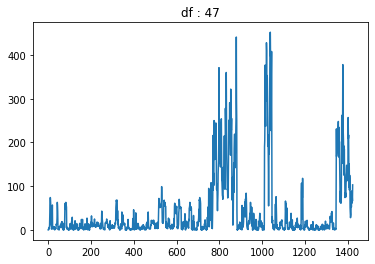

shape :  (1439, 3)


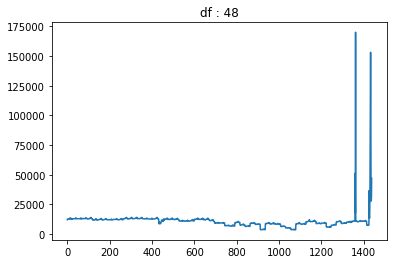

shape :  (1420, 3)


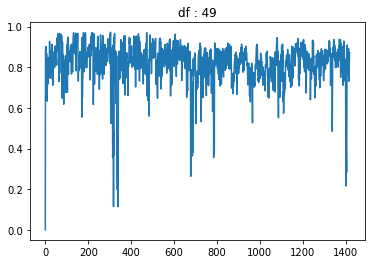

shape :  (1427, 3)


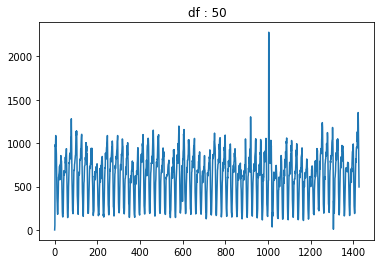

shape :  (1461, 3)


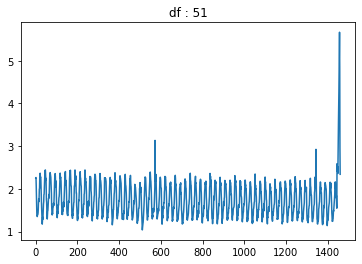

shape :  (1461, 3)


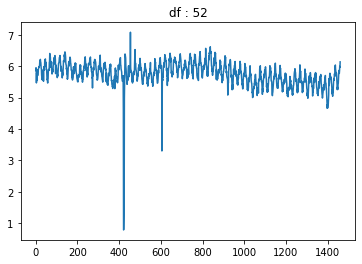

shape :  (1427, 3)


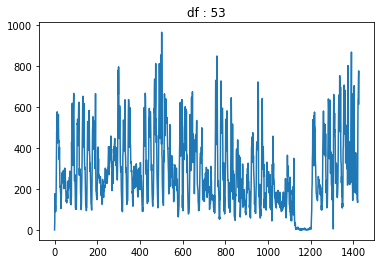

shape :  (1435, 3)


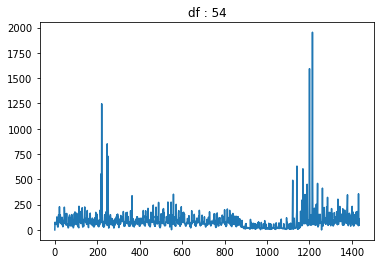

shape :  (1427, 3)


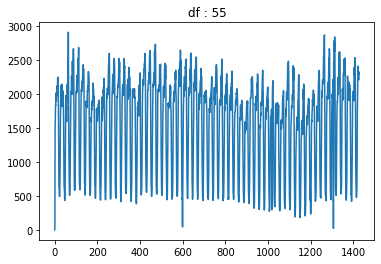

shape :  (1432, 3)


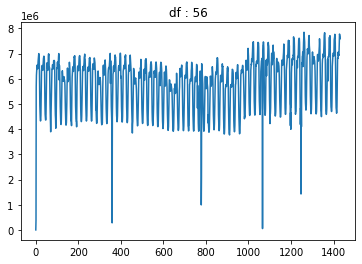

shape :  (741, 3)


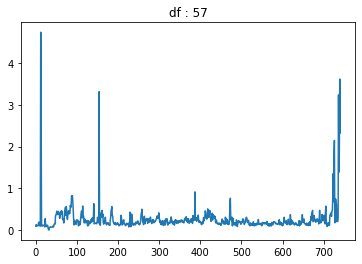

shape :  (1461, 3)


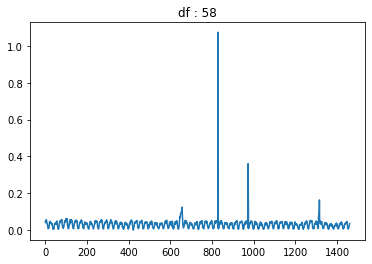

shape :  (1421, 3)


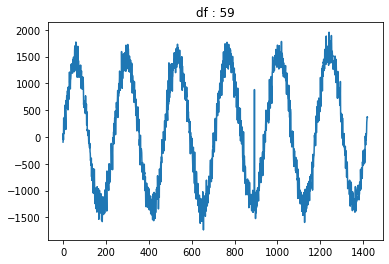

shape :  (1421, 3)


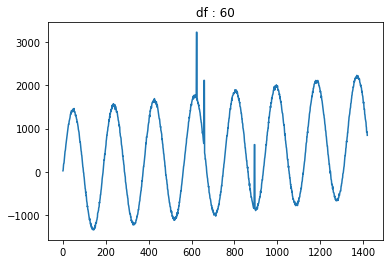

shape :  (1421, 3)


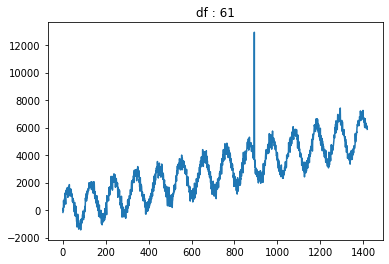

shape :  (1421, 3)


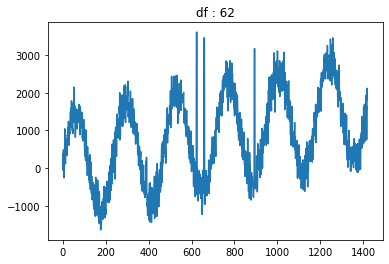

shape :  (1421, 3)


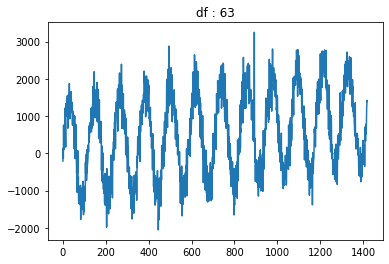

shape :  (1421, 3)


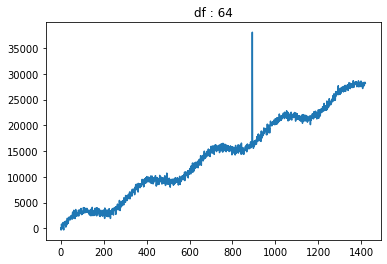

shape :  (1421, 3)


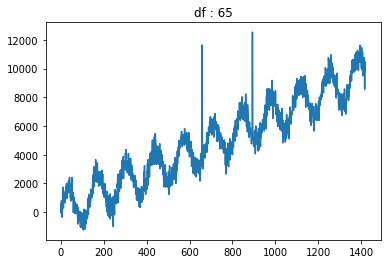

shape :  (1421, 3)


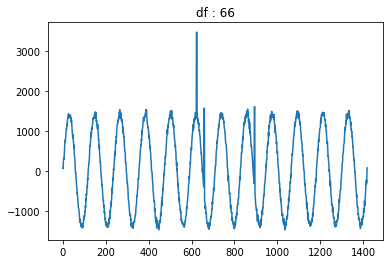

shape :  (1421, 3)


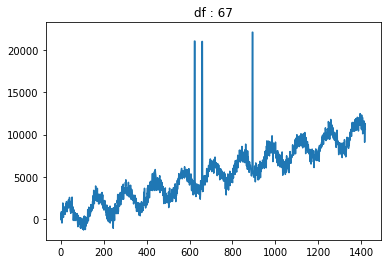

shape :  (1421, 3)


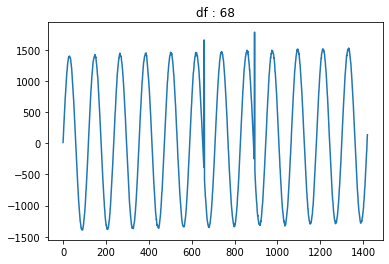

shape :  (1421, 3)


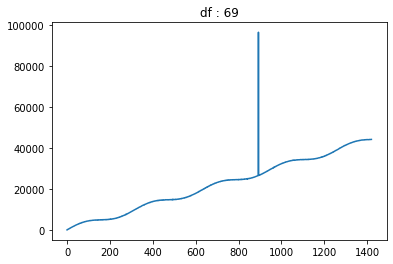

shape :  (1421, 3)


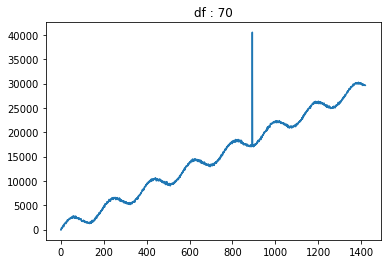

shape :  (1421, 3)


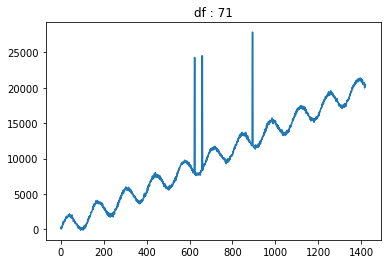

shape :  (1421, 3)


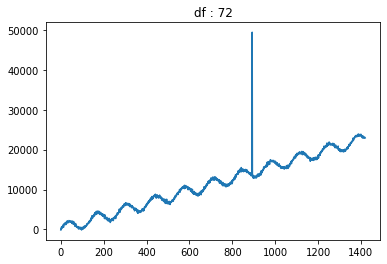

shape :  (1421, 3)


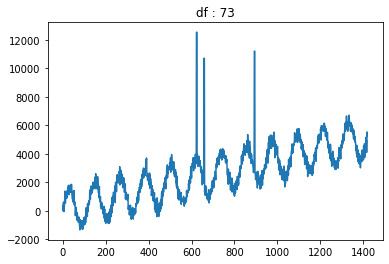

shape :  (1421, 3)


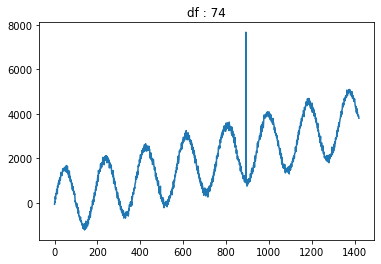

shape :  (1421, 3)


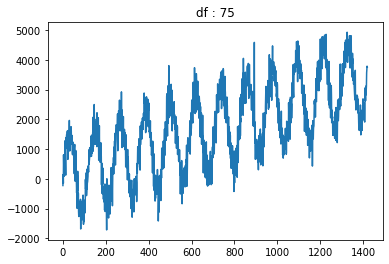

shape :  (1421, 3)


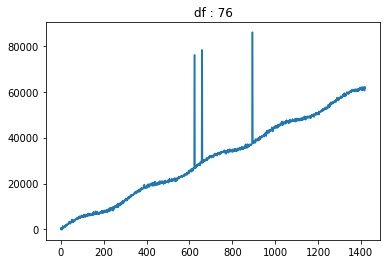

shape :  (128562, 3)


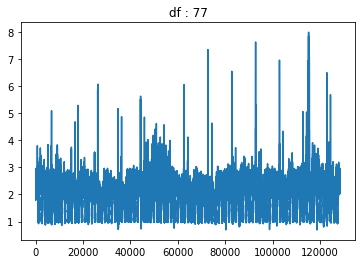

shape :  (129128, 3)


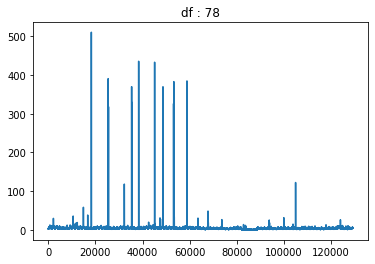

shape :  (146254, 3)


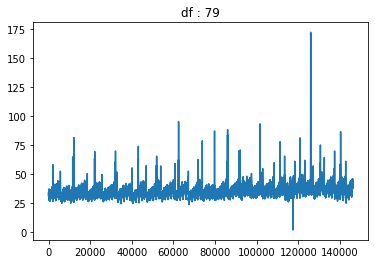

shape :  (146253, 3)


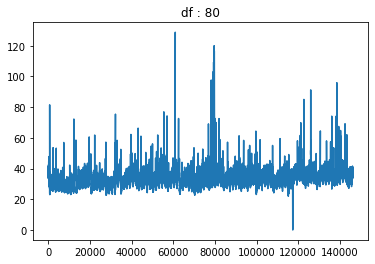

In [4]:
for i in range(len(df_list)):
    # droup duplicated
    df_list[i] = df_list[i][~ df_list[i].duplicated()]
    # drop None
    df_list[i].dropna(inplace=True)
    print('shape : ', df_list[i].shape)
    # plot
    df_list[i]['value'].plot()
    plt.title('df : {}'.format(i))
    plt.show()

### stationery

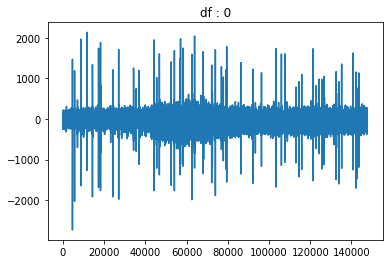

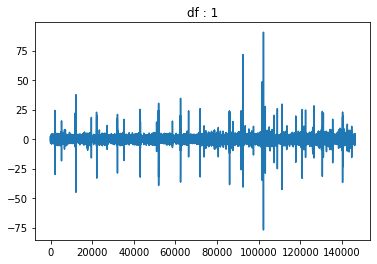

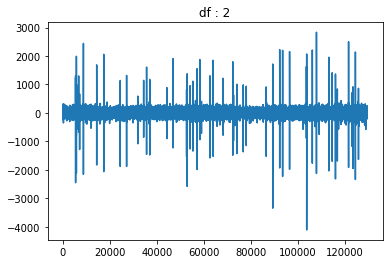

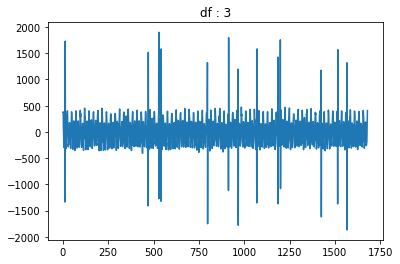

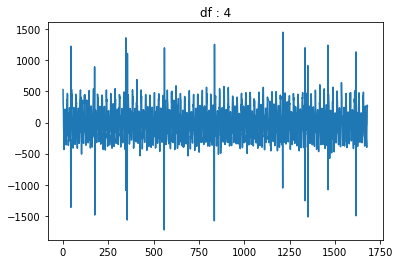

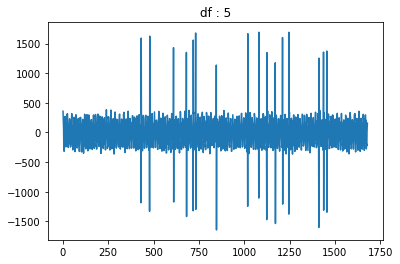

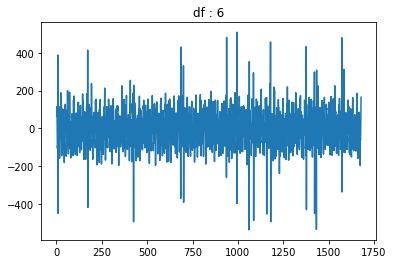

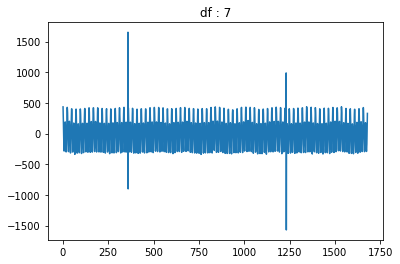

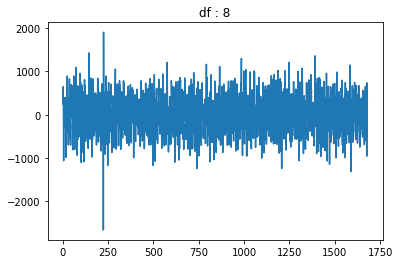

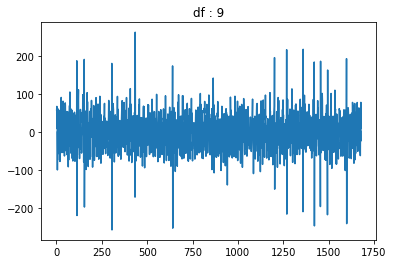

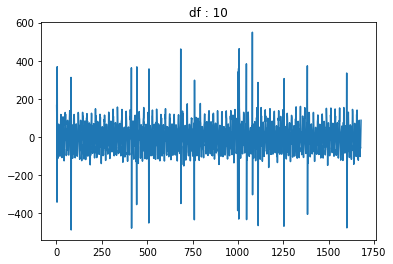

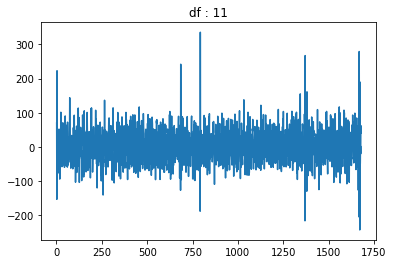

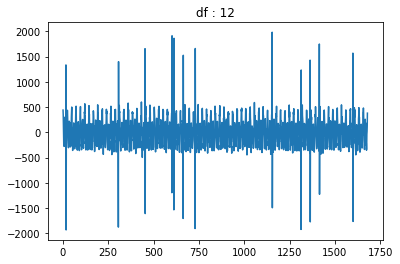

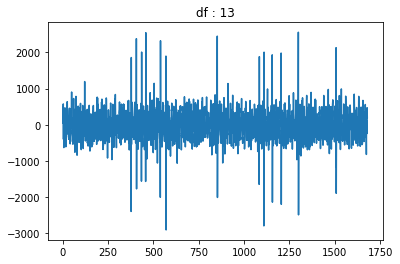

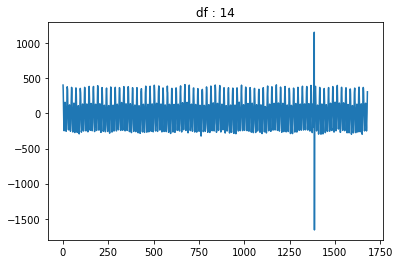

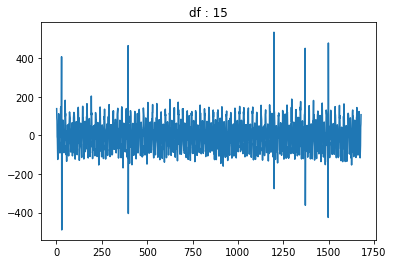

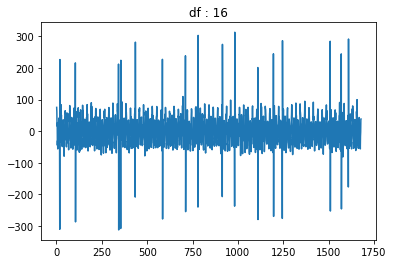

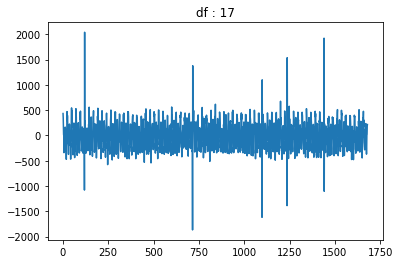

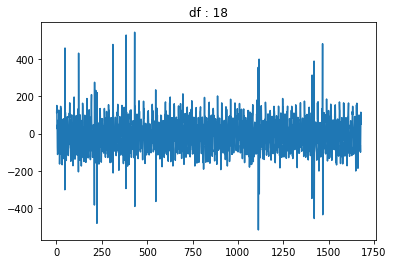

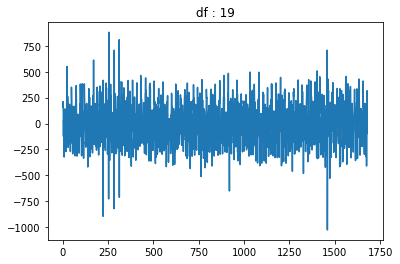

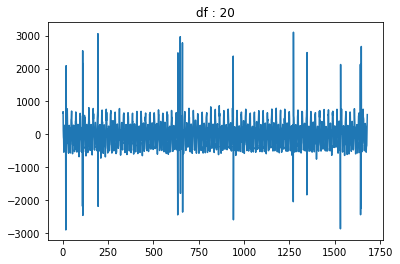

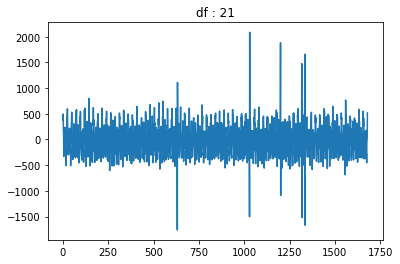

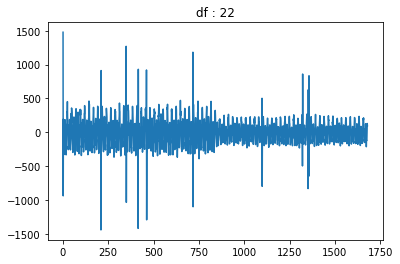

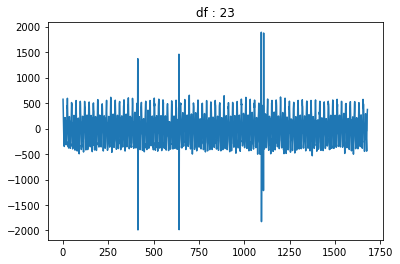

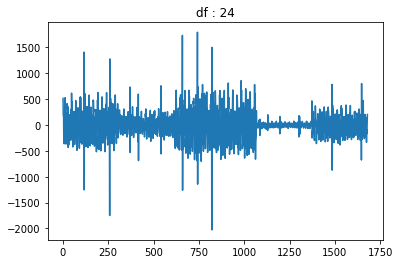

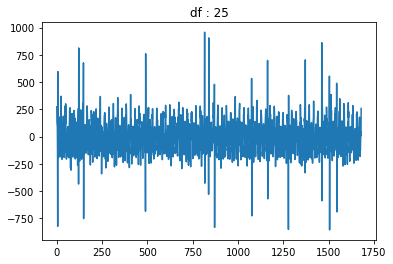

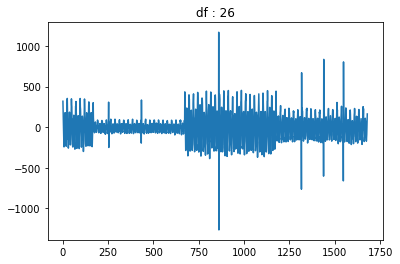

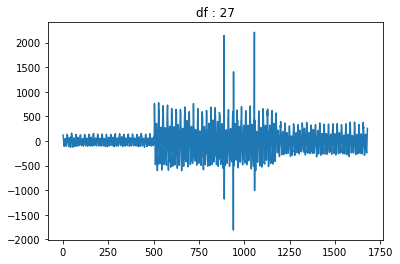

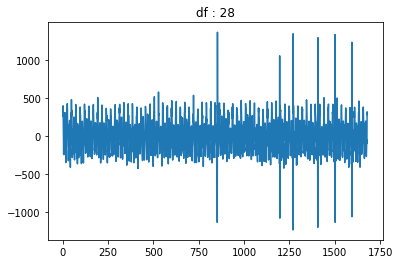

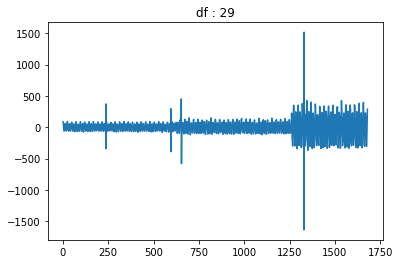

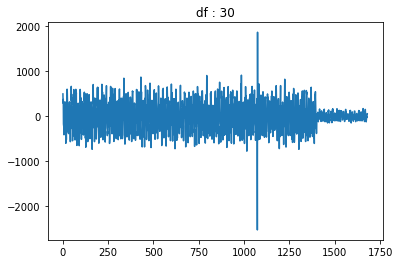

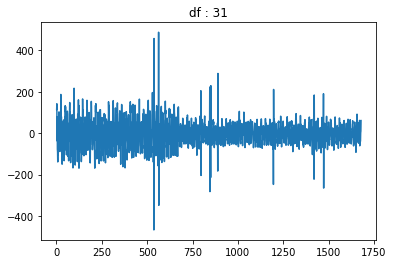

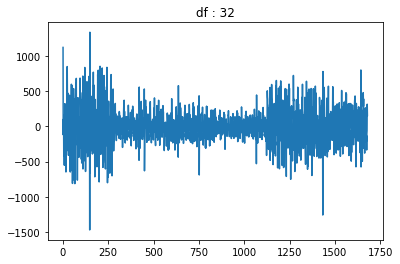

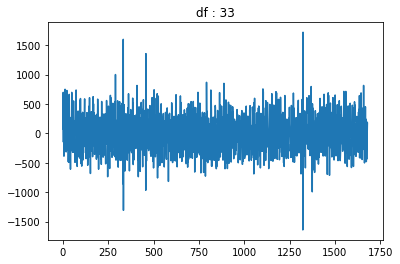

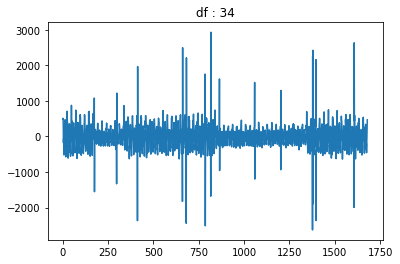

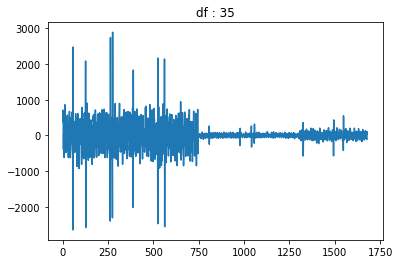

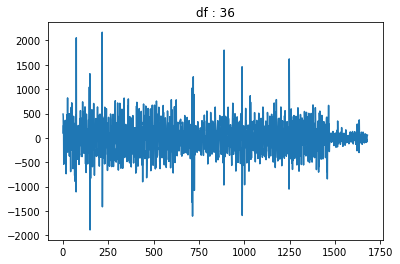

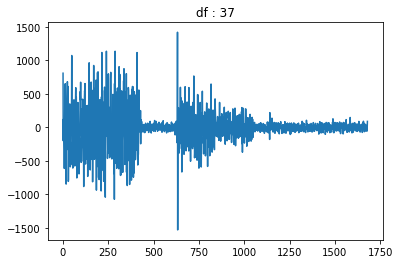

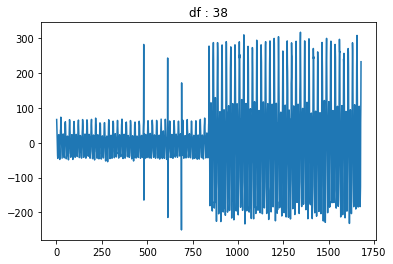

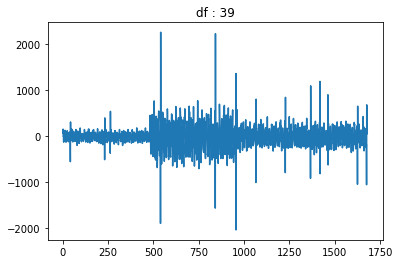

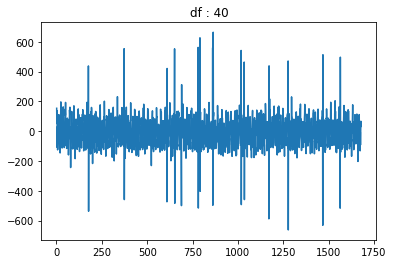

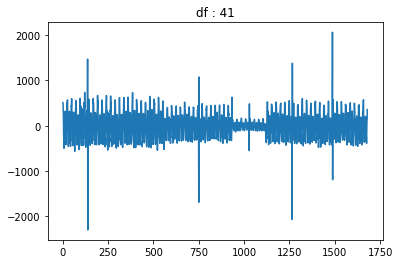

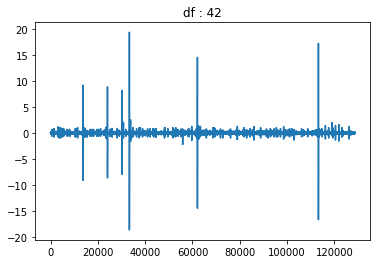

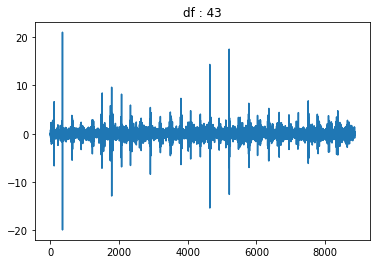

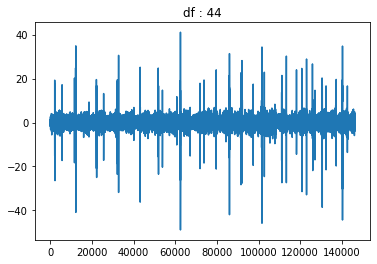

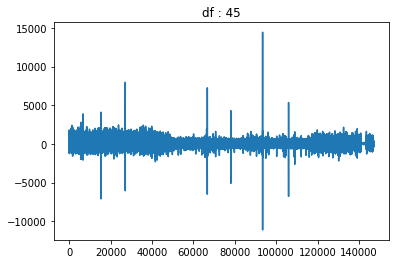

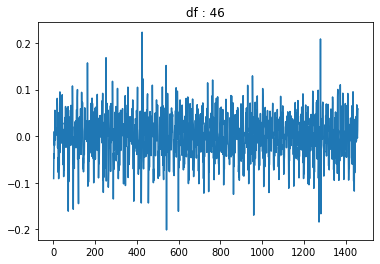

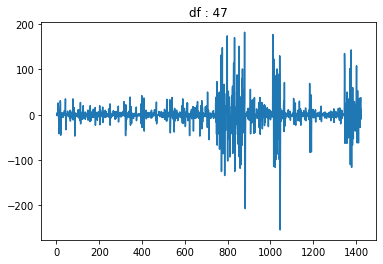

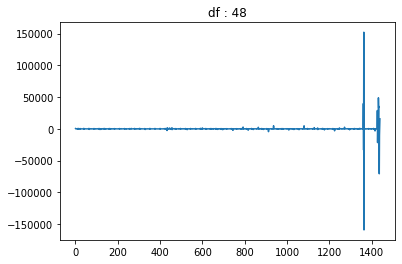

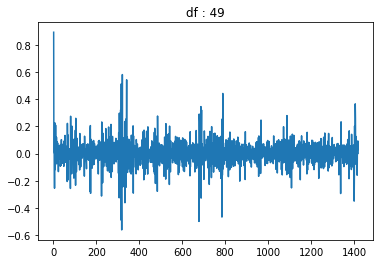

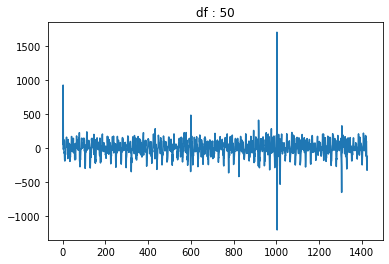

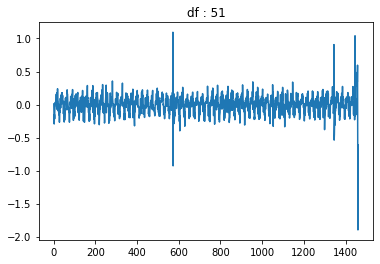

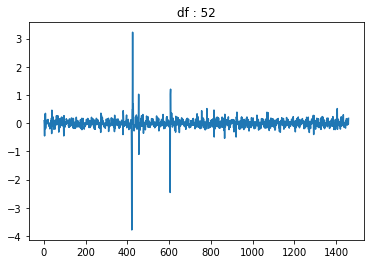

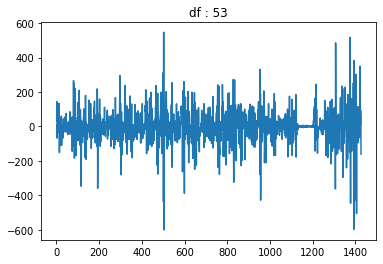

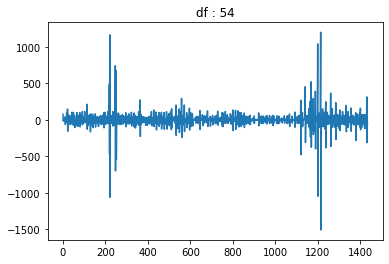

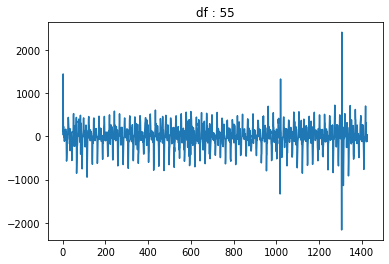

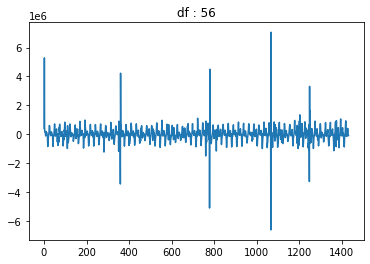

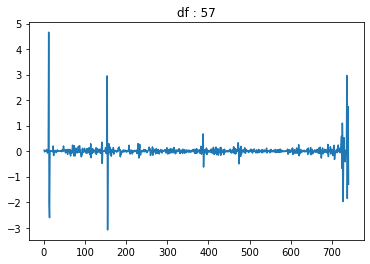

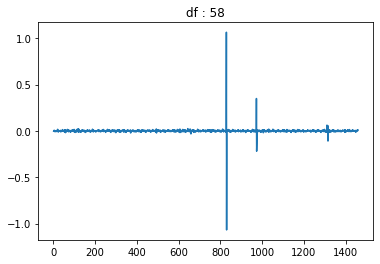

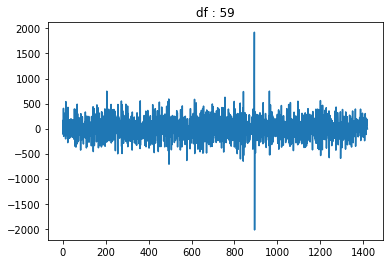

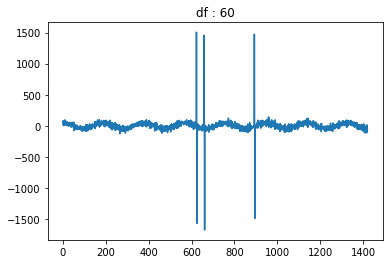

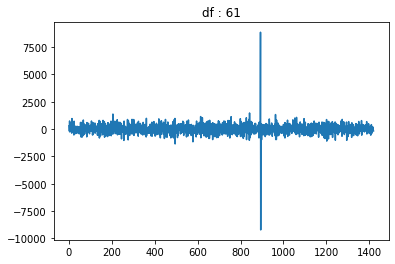

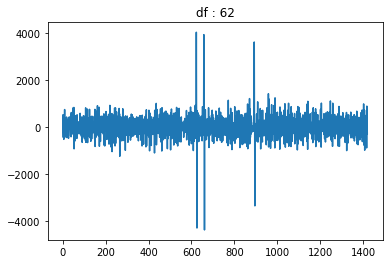

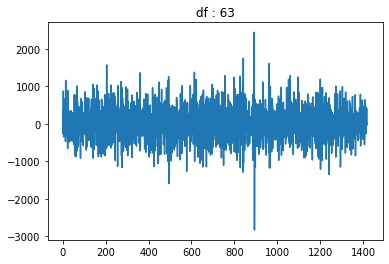

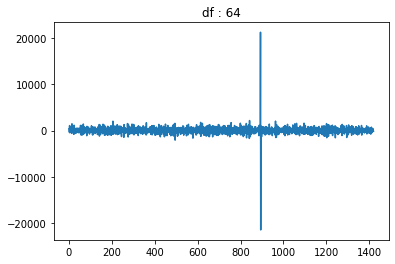

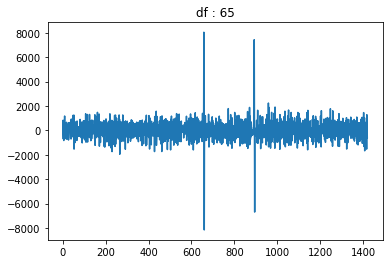

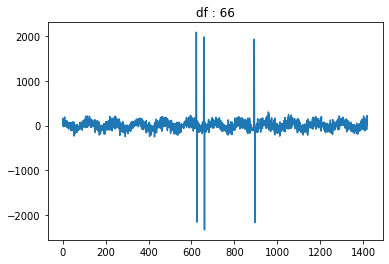

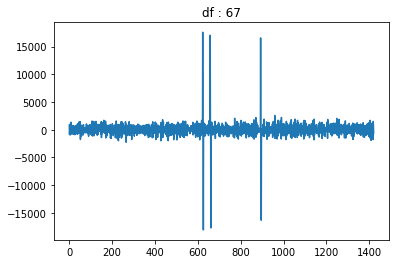

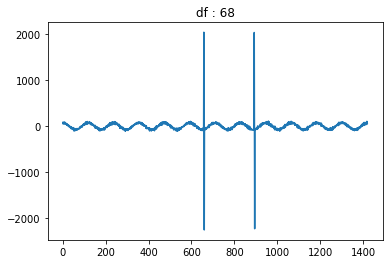

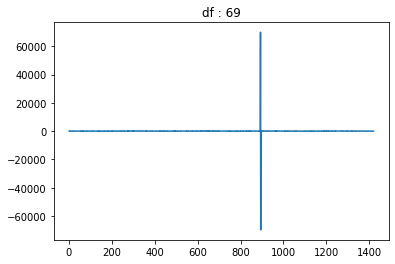

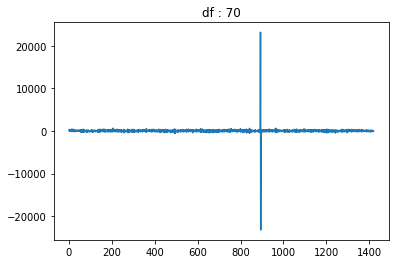

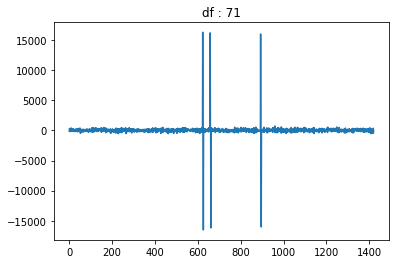

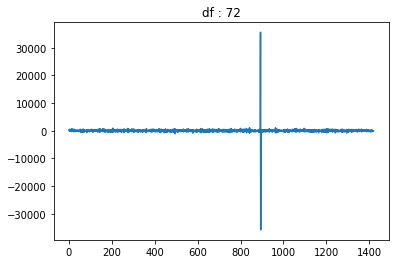

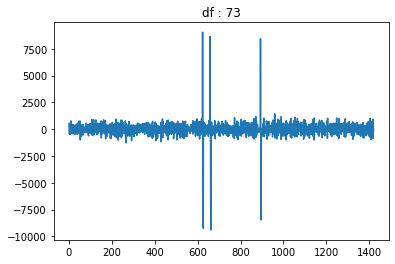

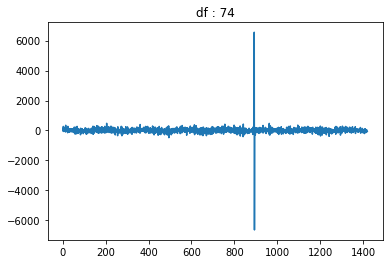

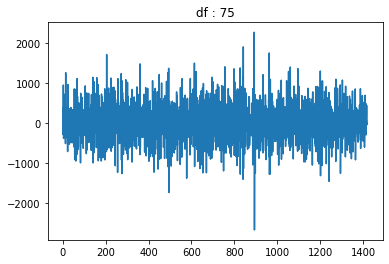

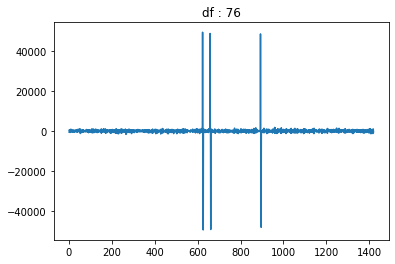

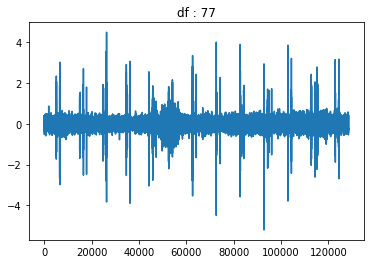

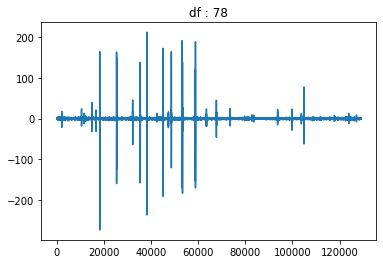

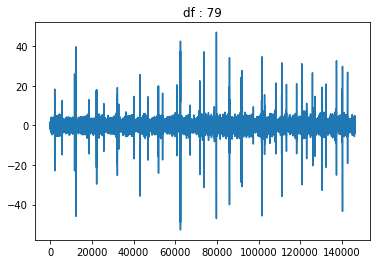

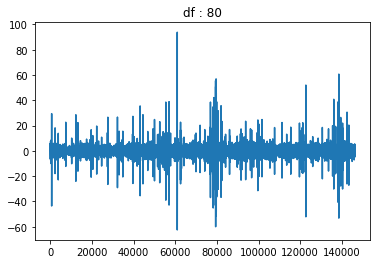

In [5]:
for i in range(len(df_list)):
    df_list[i]['value'].diff().plot()
    plt.title('df : {}'.format(i))
    plt.show()

### std

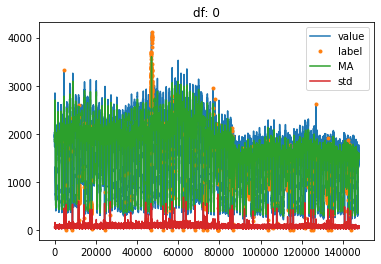

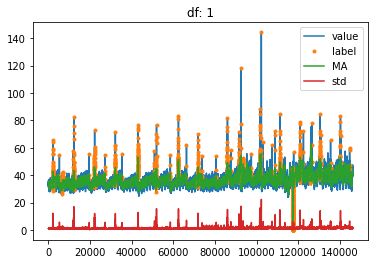

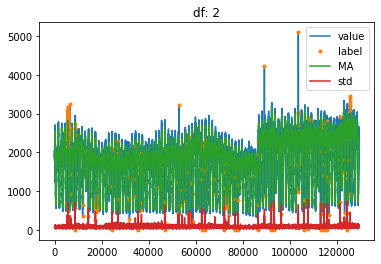

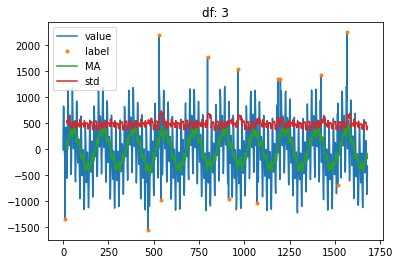

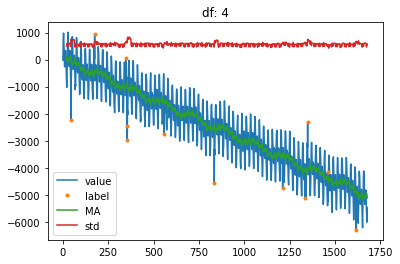

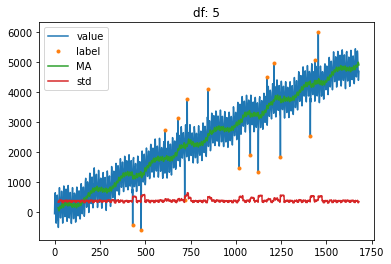

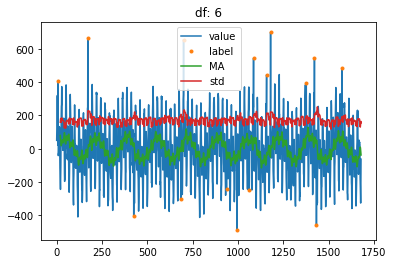

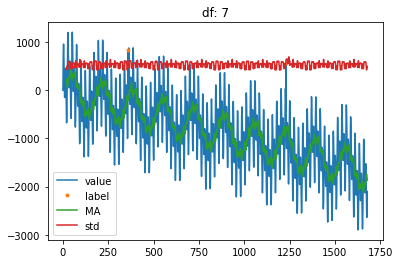

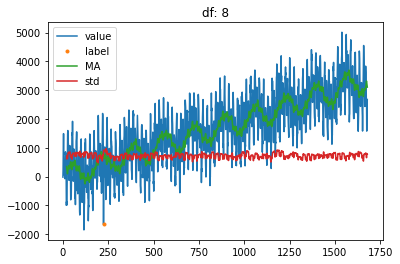

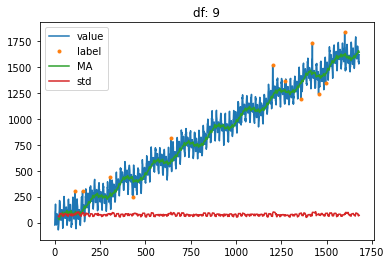

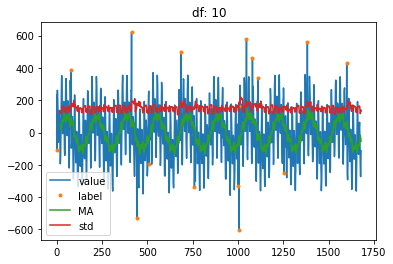

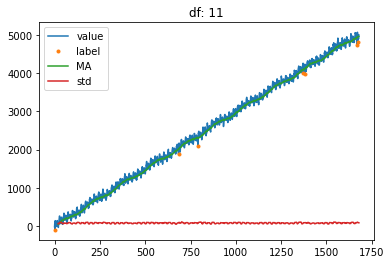

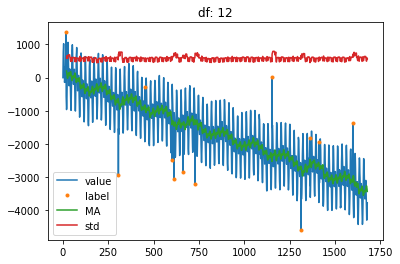

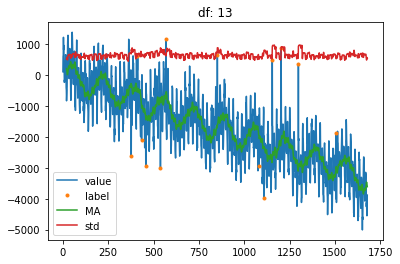

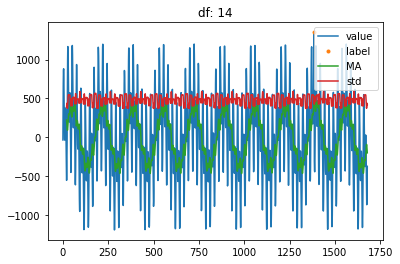

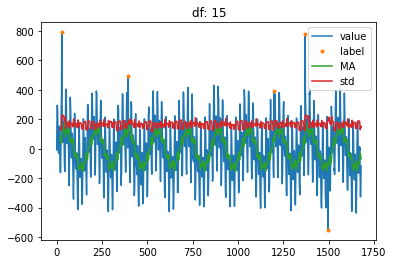

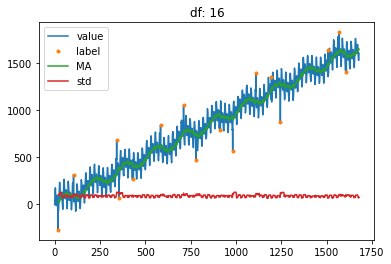

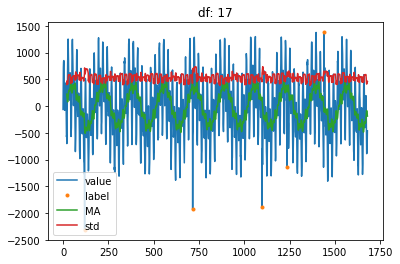

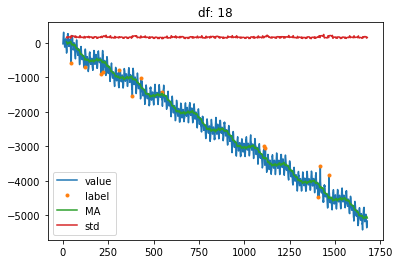

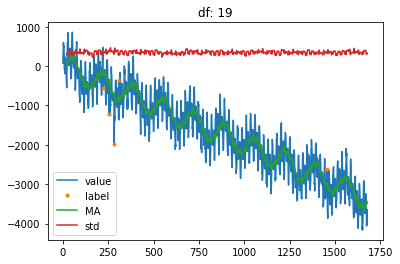

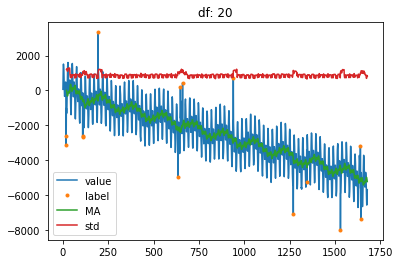

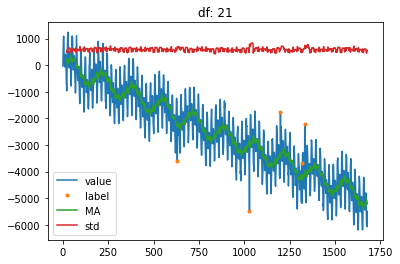

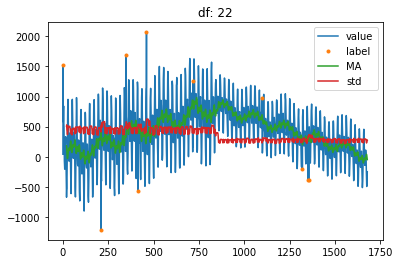

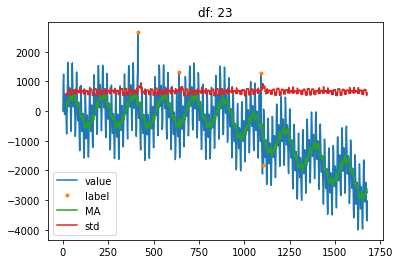

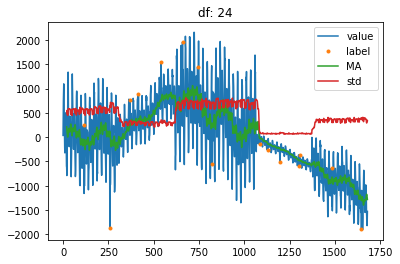

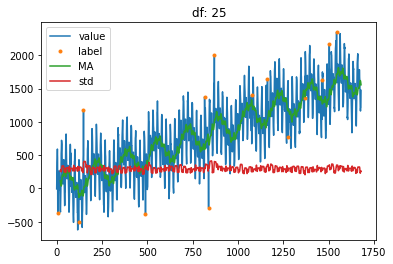

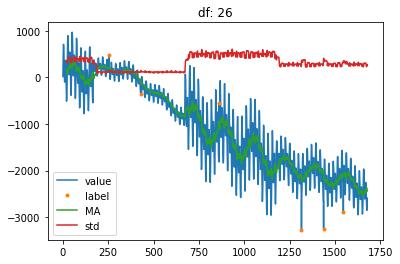

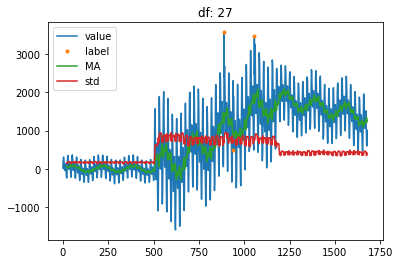

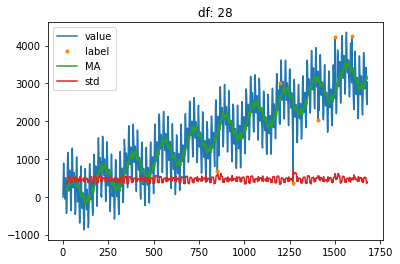

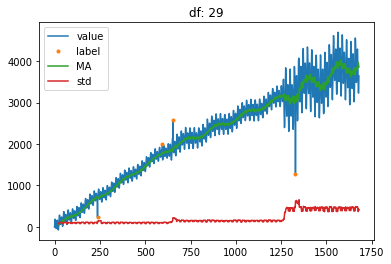

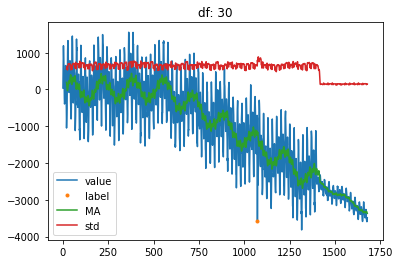

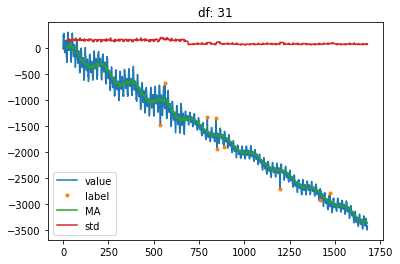

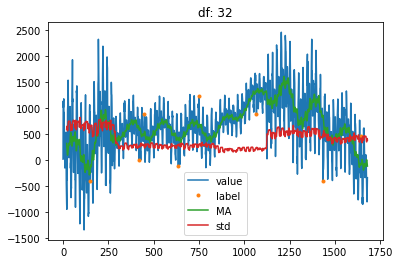

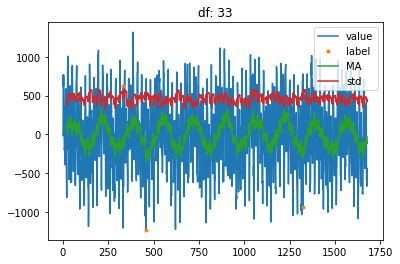

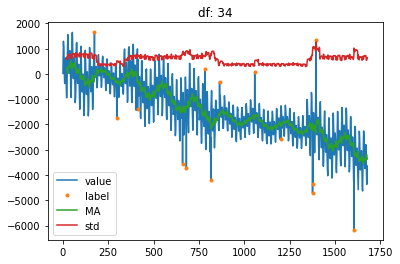

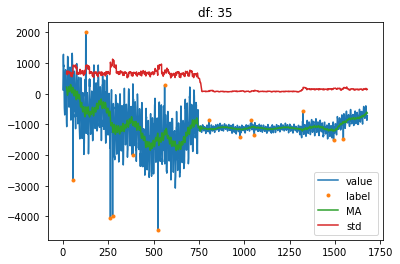

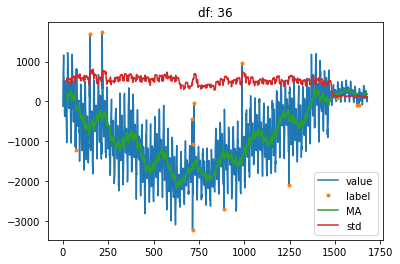

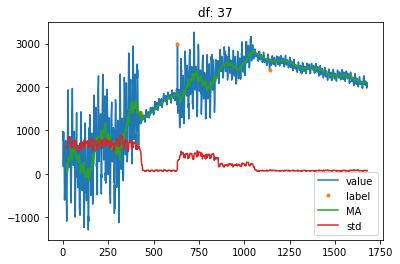

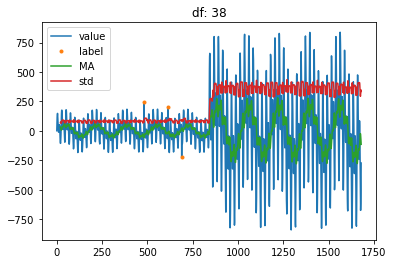

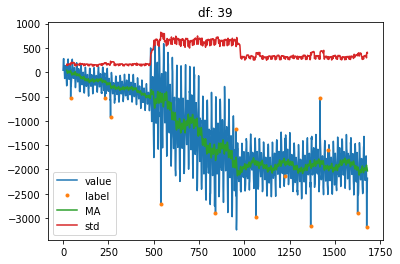

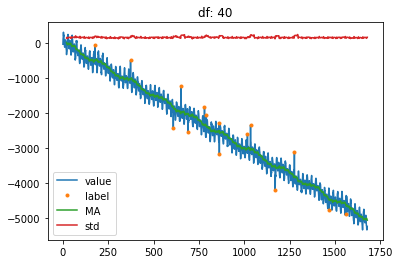

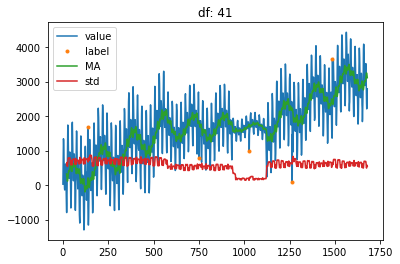

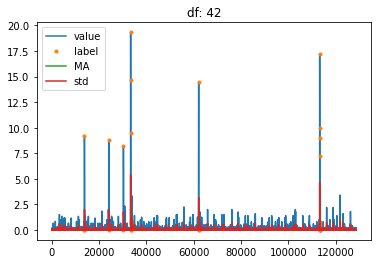

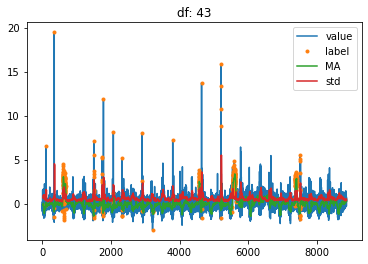

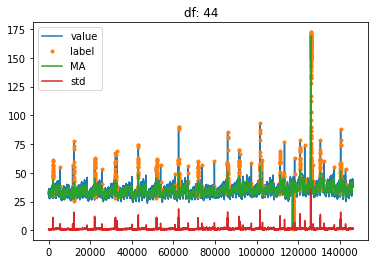

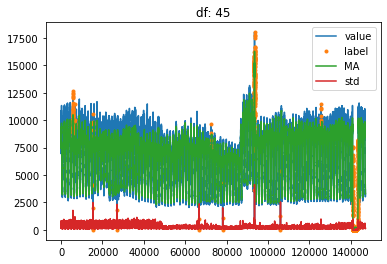

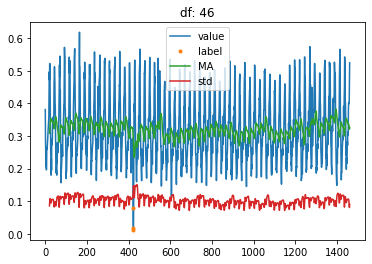

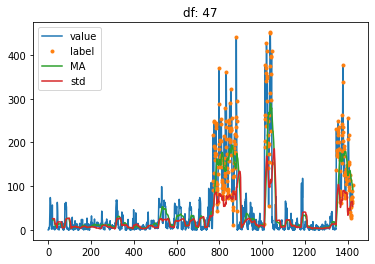

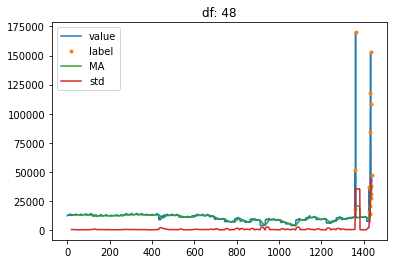

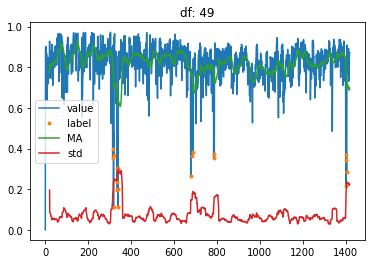

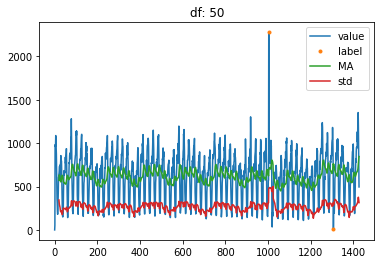

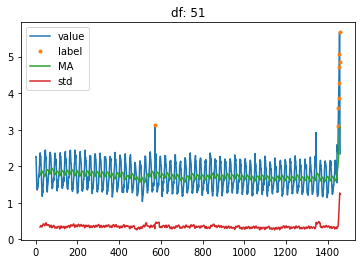

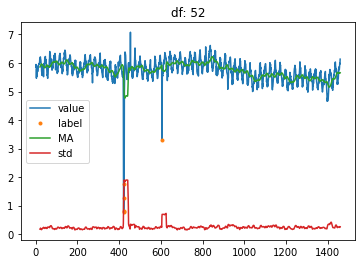

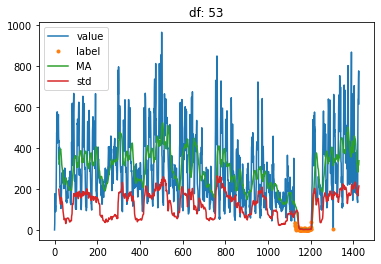

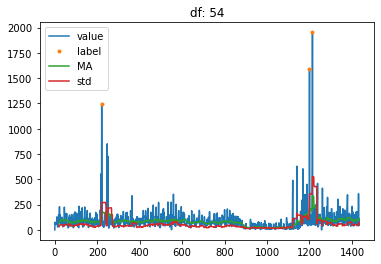

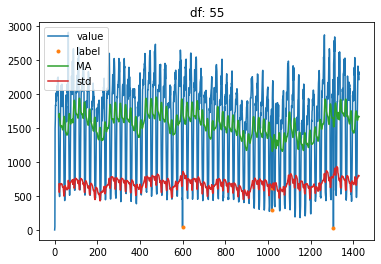

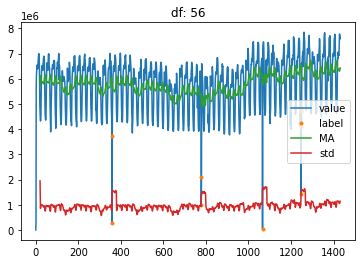

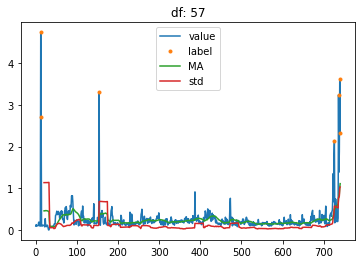

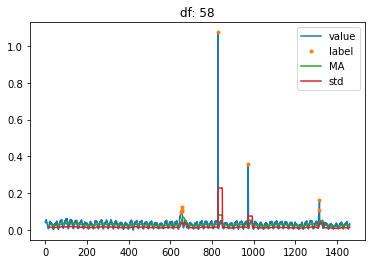

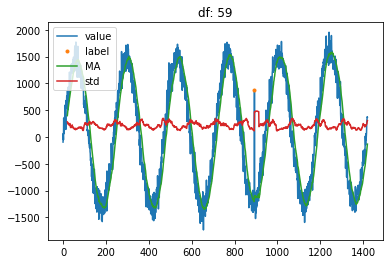

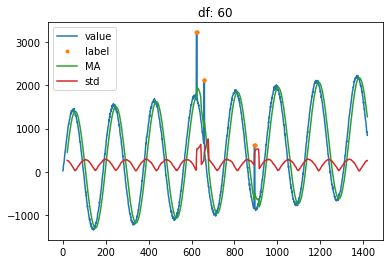

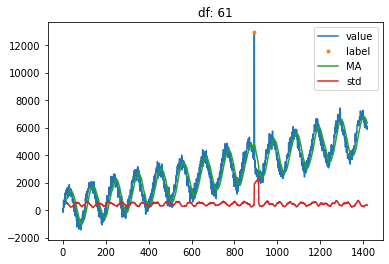

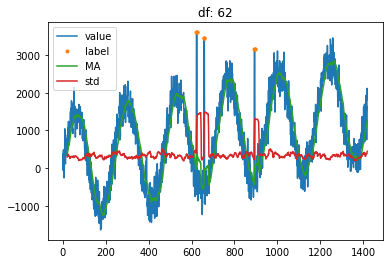

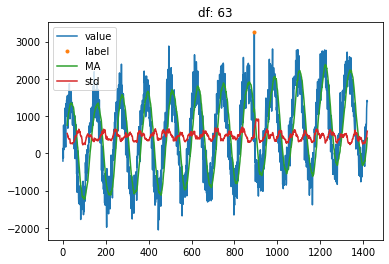

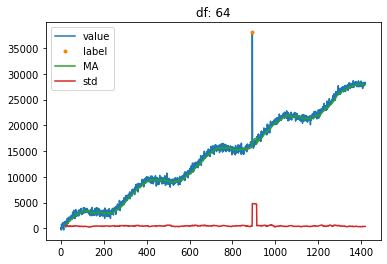

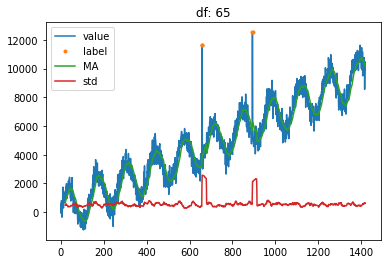

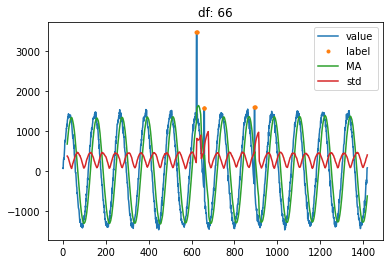

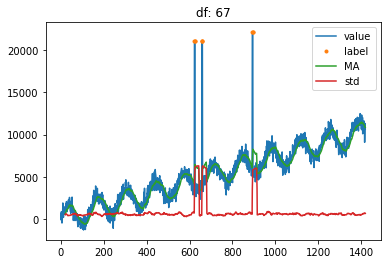

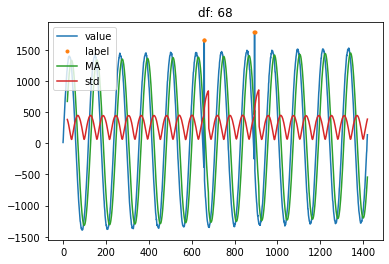

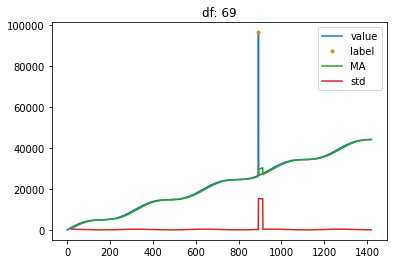

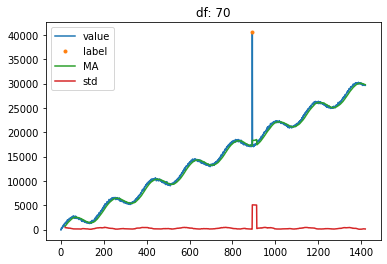

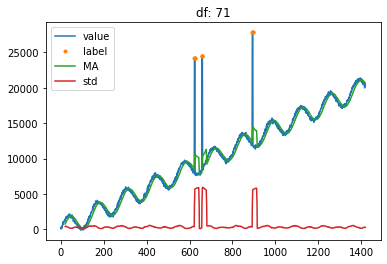

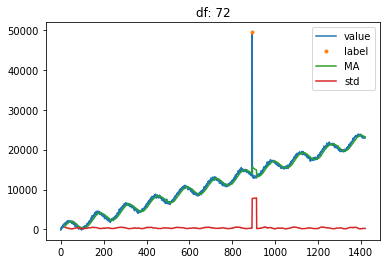

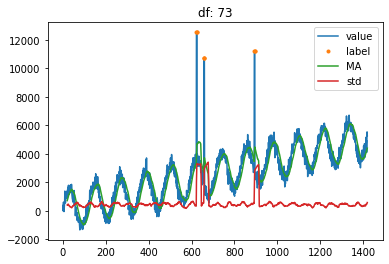

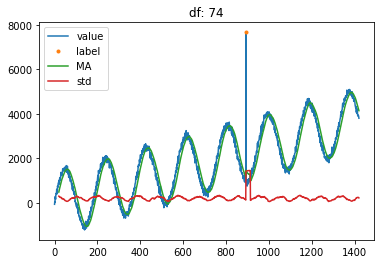

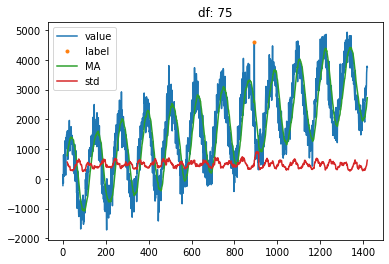

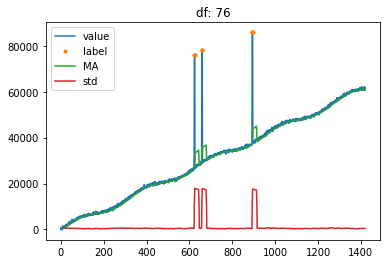

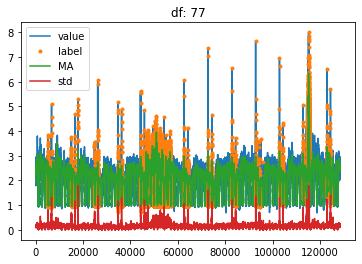

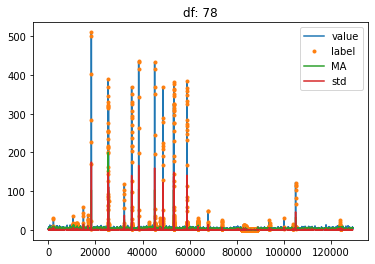

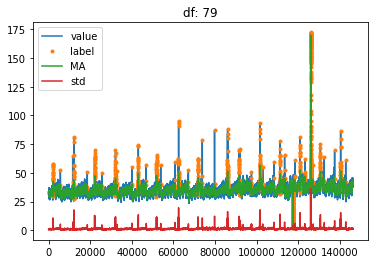

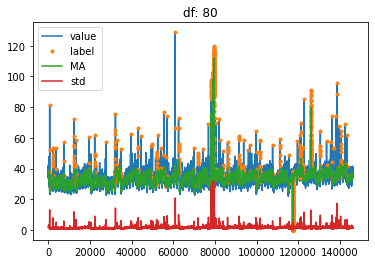

In [15]:
count = 0
for i in df_list:
    i.value.plot(label='value')
    i.value[i.label == 1].plot(style='.', label='label')
    i.value.rolling(21).mean().plot(label='MA')
    i.value.rolling(21).std().plot(label='std')
    plt.legend()
    plt.title('df: {}'.format(count))
    count+=1
    plt.show()

In [24]:
df = df_list[77]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128562 entries, 0 to 128561
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  128562 non-null  int64  
 1   value      128562 non-null  float64
 2   label      128562 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.9 MB


In [18]:
df.dtypes

timestamp      int64
value        float64
label          int64
dtype: object

<AxesSubplot:>

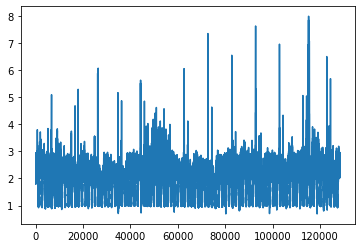

In [19]:
df.value.plot()

<AxesSubplot:>

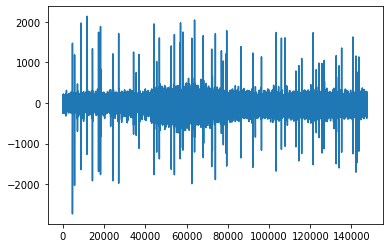

In [11]:
df_diff = df.value.diff()
df_diff.plot()

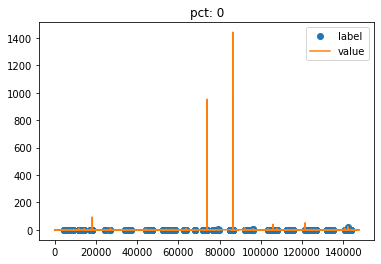

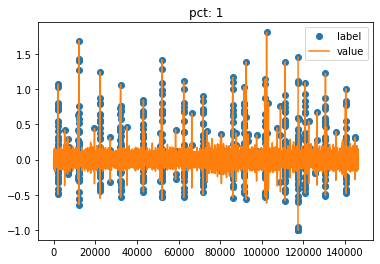

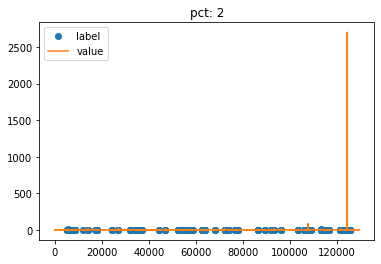

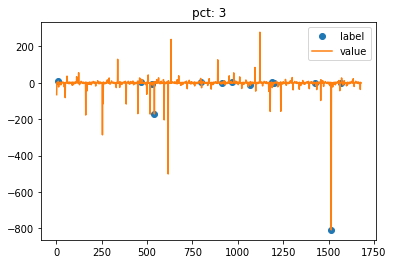

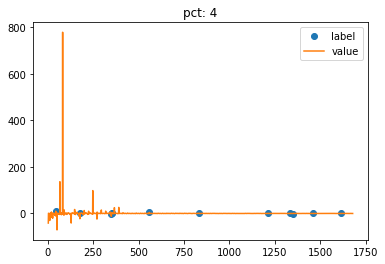

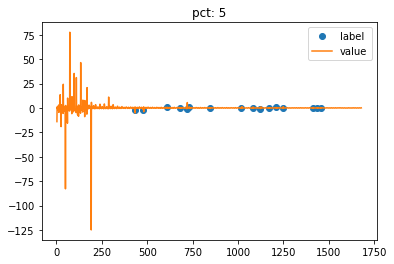

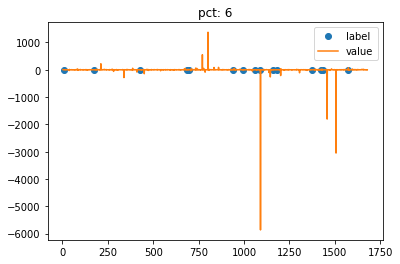

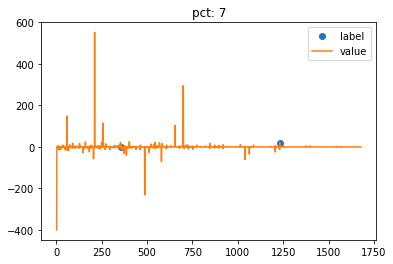

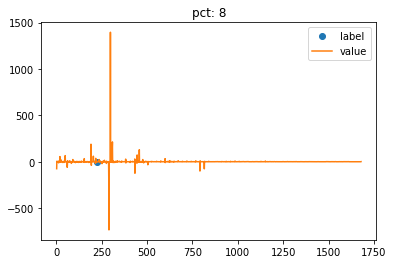

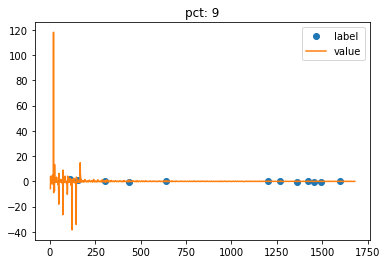

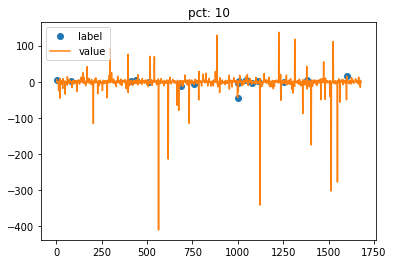

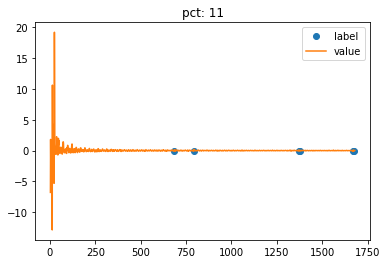

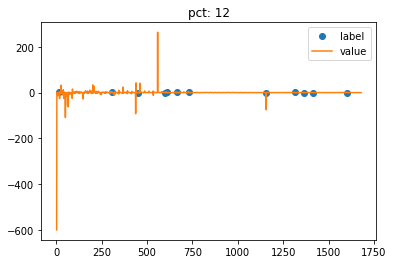

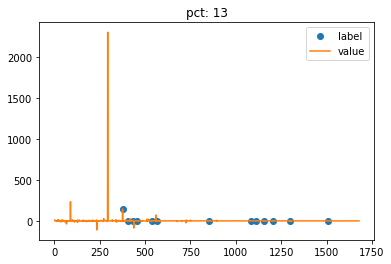

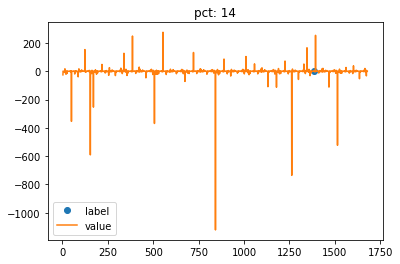

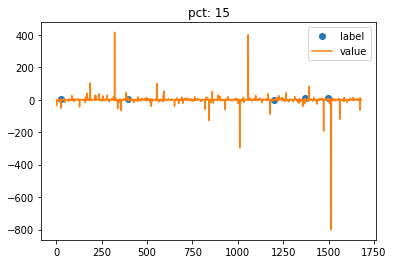

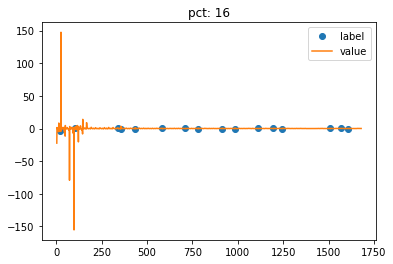

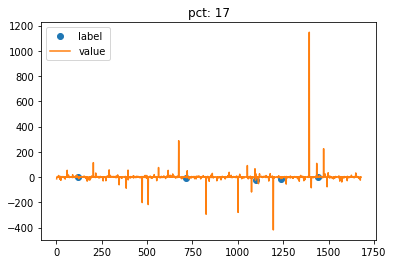

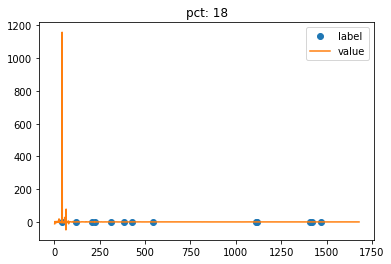

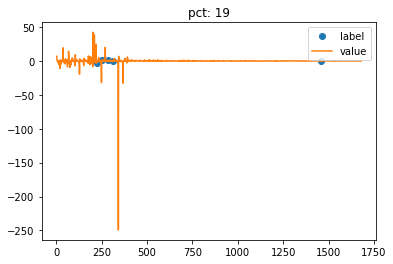

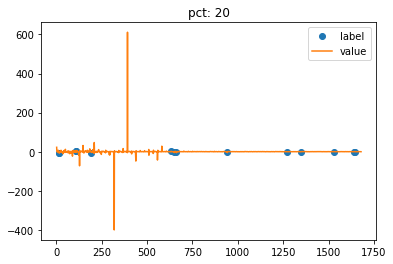

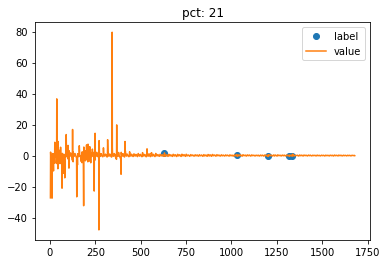

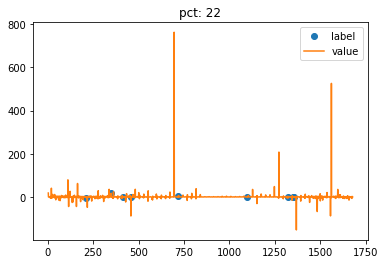

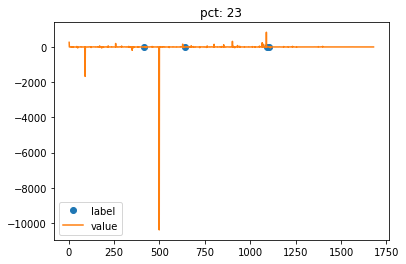

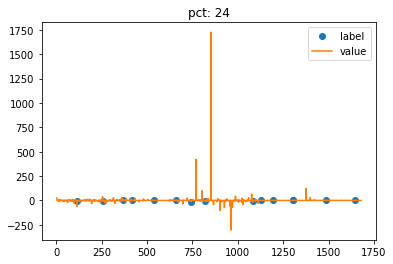

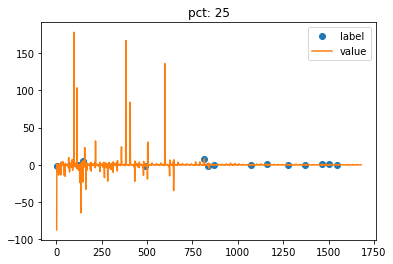

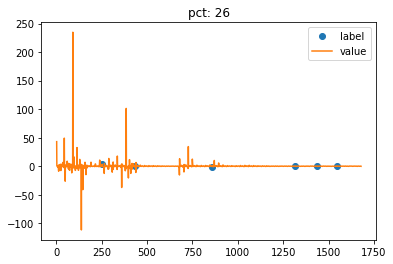

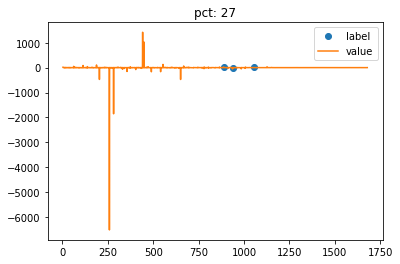

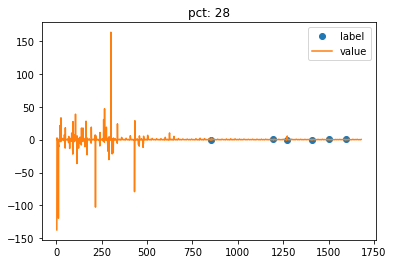

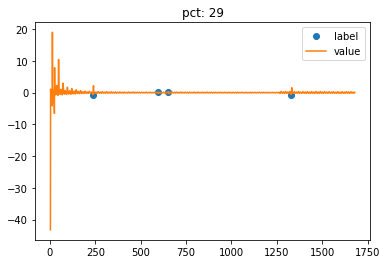

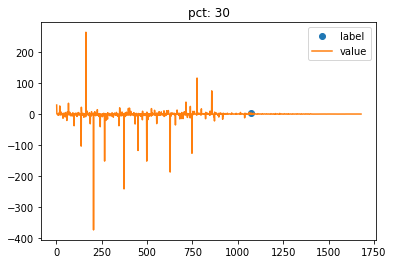

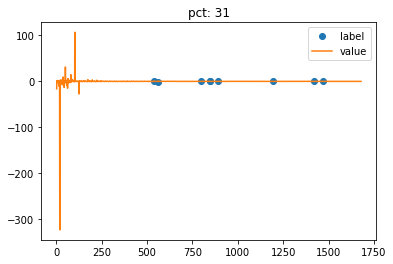

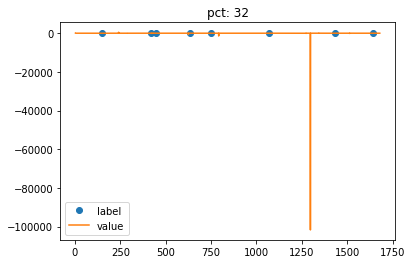

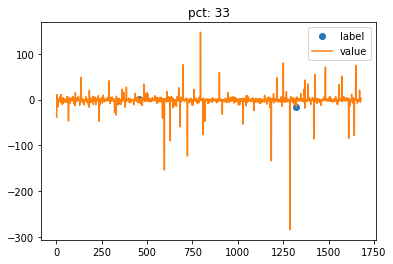

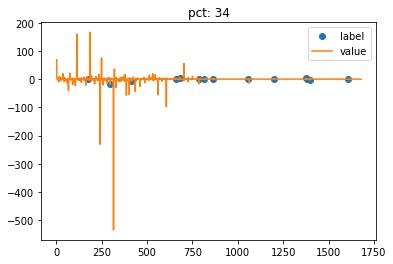

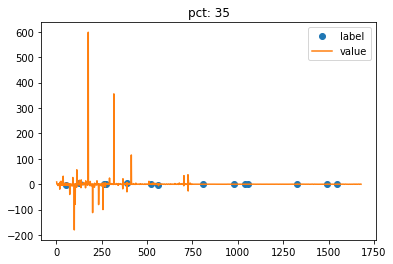

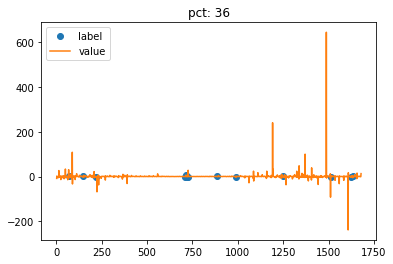

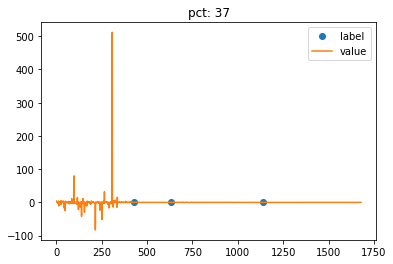

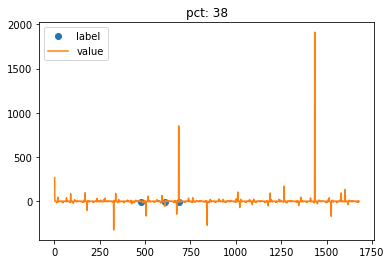

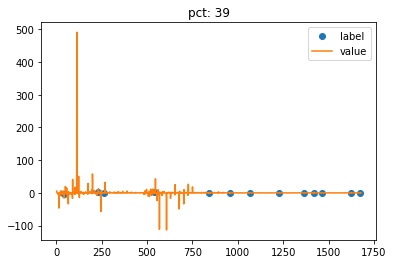

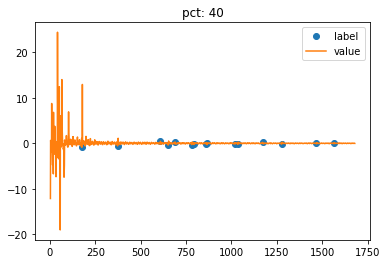

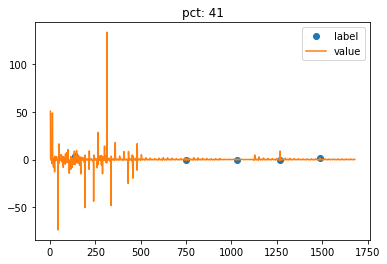

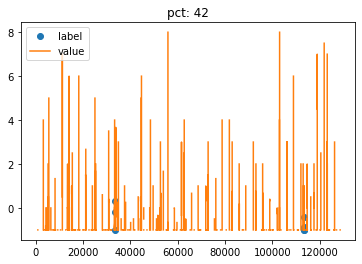

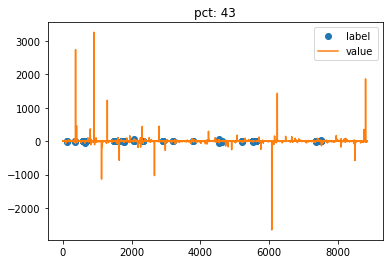

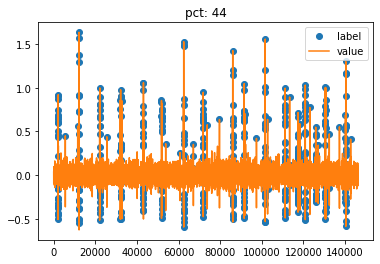

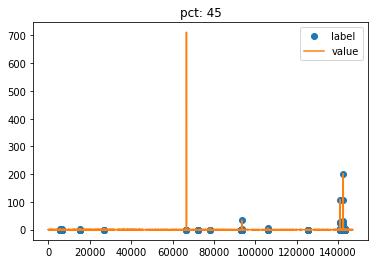

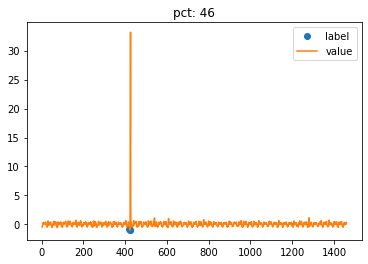

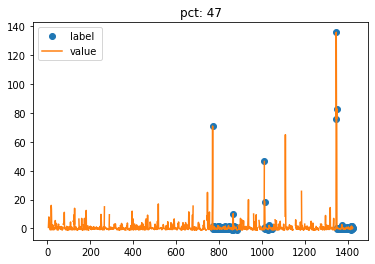

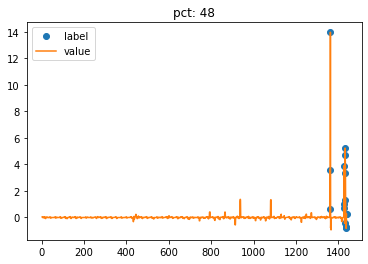

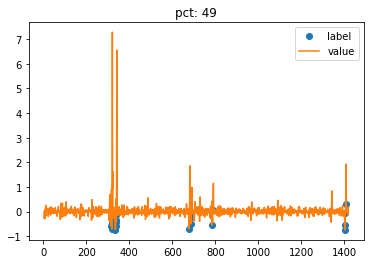

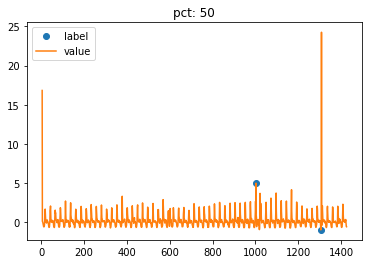

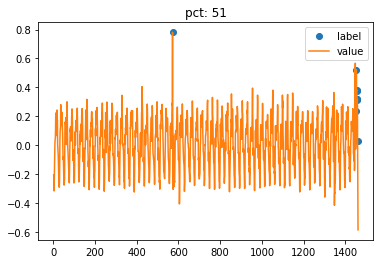

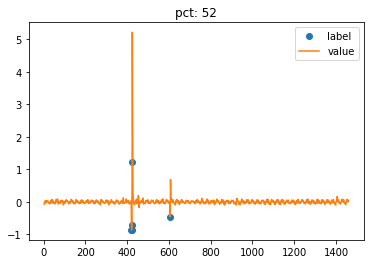

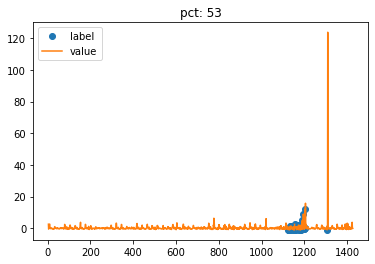

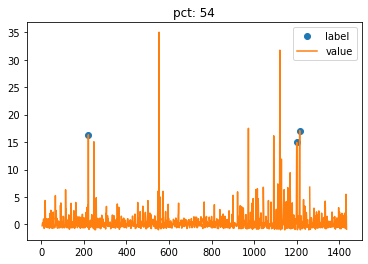

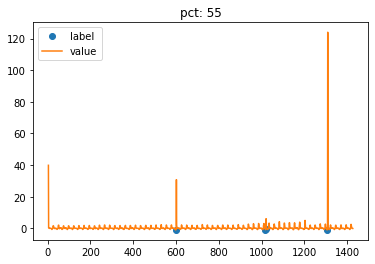

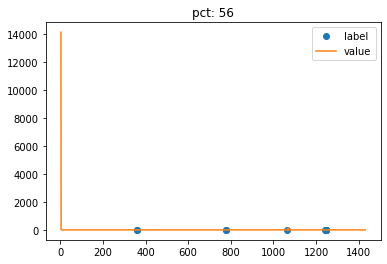

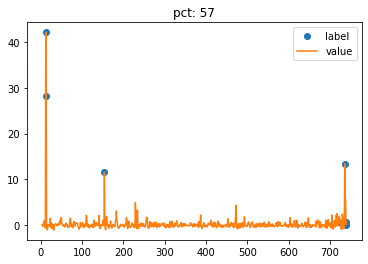

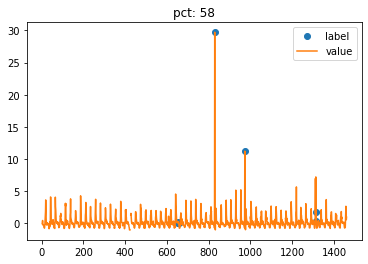

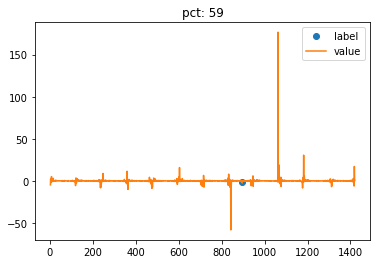

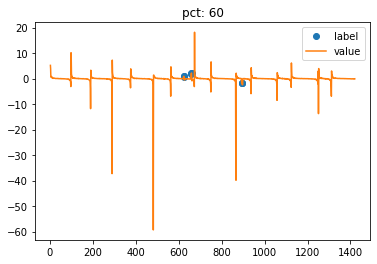

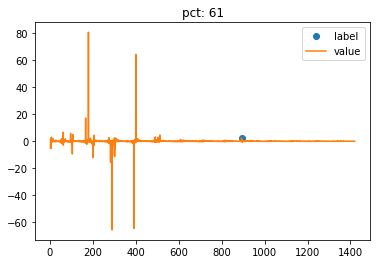

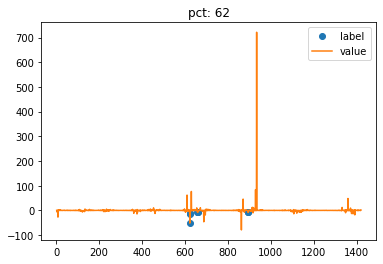

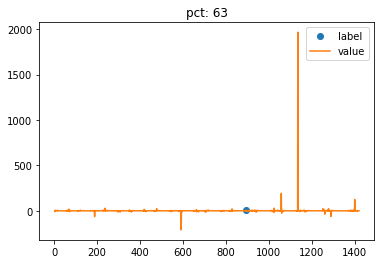

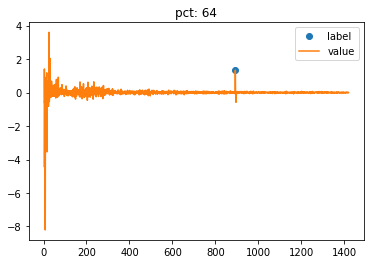

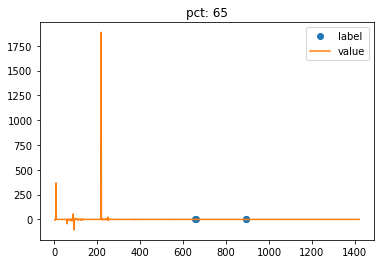

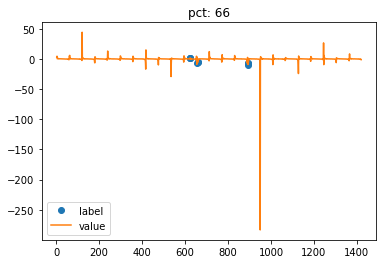

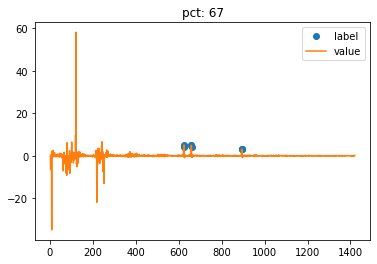

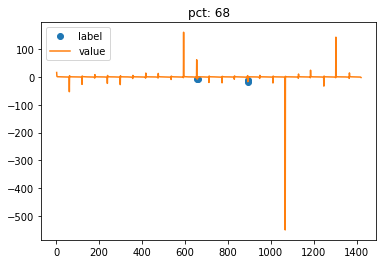

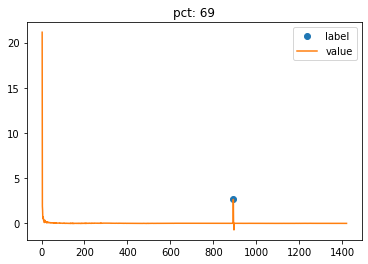

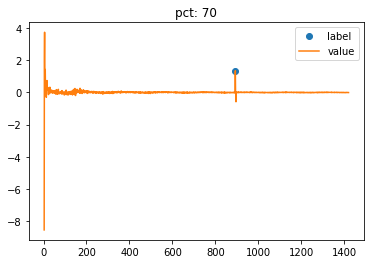

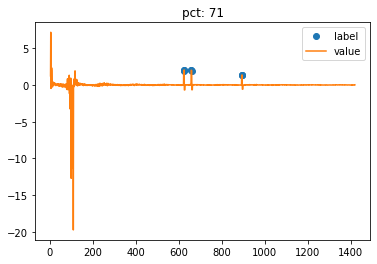

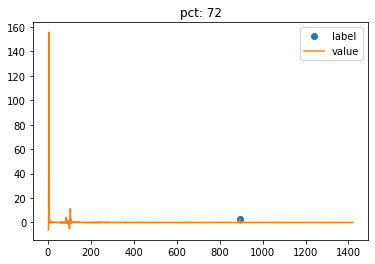

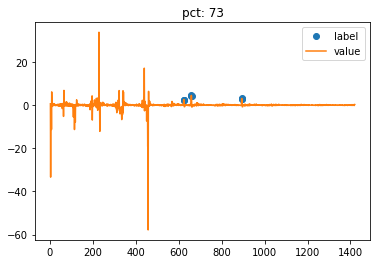

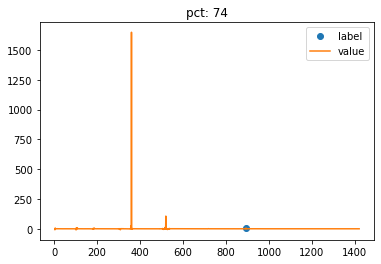

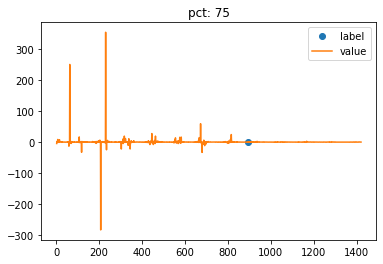

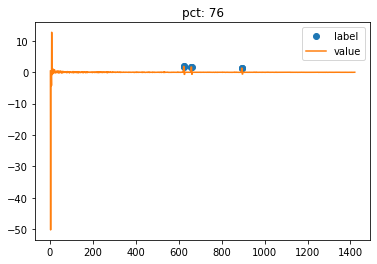

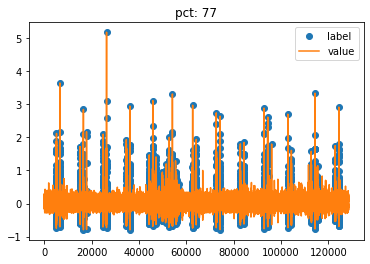

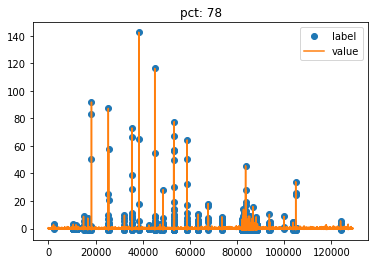

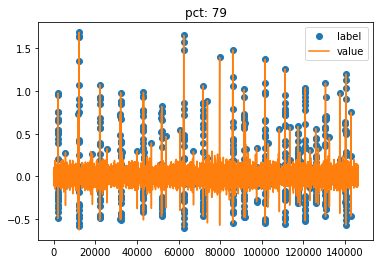

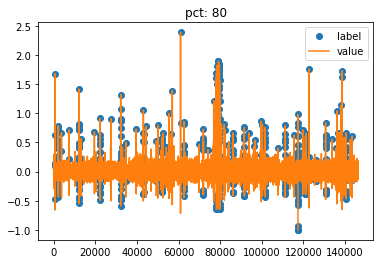

In [32]:
for i in range(len(df_list)):
    df = df_list[i]
    df_pc = df.value.pct_change(3)
    df_pc[df.label == 1].plot(style='o', label='label')
    df_pc.plot(label='value')
    plt.title('pct: {}'.format(i))
    plt.legend()
    plt.show()

In [13]:
for i in range(100):
    if df_diff.autocorr(i) > 0.90:
        print('i ',i,' : ', df_diff.autocorr(i) )

i  0  :  1.0


In [35]:
df = df_list[77]
df.value[df.label == 1].count()/df.shape[0]

0.08206157340427186

---
### COX-BOX

In [13]:
from scipy import stats

In [14]:
df[df.value == 0]

timestamp  value  label
5657    1491382320    0.0      1
8687    1491565020    0.0      1
24269   1492507860    0.0      1
46785   1493889600    0.0      1
52566   1494237720    0.0      1
56903   1494498900    0.0      1
62534   1494840000    0.0      1
68074   1495176120    0.0      1
72183   1495427460    0.0      1
79235   1495858020    0.0      1
79236   1495859040    0.0      1
79238   1495860120    0.0      1
79465   1495874400    0.0      1
103474  1497351300    0.0      1
114473  1498032480    0.0      1
115849  1498117440    0.0      1
124323  1498644720    0.0      1
125631  1498725900    0.0      1
132579  1499158200    0.0      1
133982  1499245680    0.0      1
143597  1499848920    0.0      1

In [21]:
xt= stats.boxcox(np.array(df[df.value != 0].value), 0)
xt

array([7.51697722, 7.51860722, 7.57404501, ..., 7.31121838, 7.33432935,
       7.36960072])

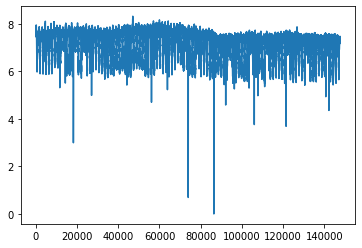

In [22]:
plt.plot(xt)


<AxesSubplot:>

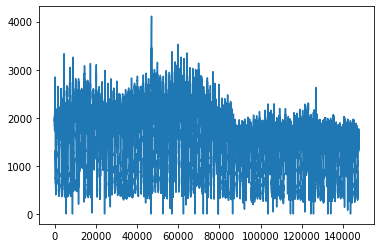

In [23]:
df.value.plot()

In [24]:
df[(df.label == 1) & (df. value != 0)].index

Int64Index([  4623,   4624,   4625,   4626,   5656,   5658,   5659,   7059,
              7060,   8685,
            ...
            142212, 142213, 142676, 142677, 142678, 142679, 143595, 143596,
            143598, 143599],
           dtype='int64', length=1092)

In [25]:
xt[df[(df.label == 1) & (df. value != 0)].index]

array([7.52779399, 8.11102784, 6.39692966, ..., 7.44833386, 7.50439156,
       7.48885296])

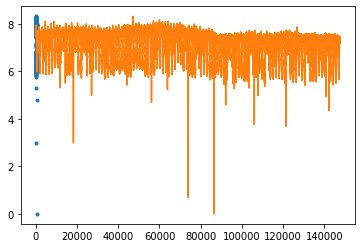

In [26]:
plt.plot(xt[df[(df.label == 1) & (df. value != 0)].index], '.')
plt.plot(xt)

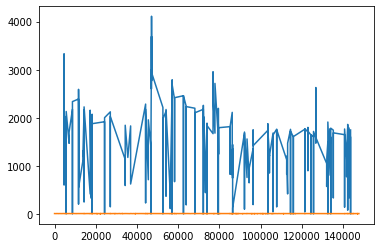

In [27]:
df.value[df.label == 1].plot()
plt.plot(xt)

<AxesSubplot:>

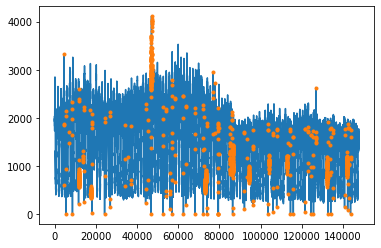

In [28]:
df.value.plot()
df.value[df.label == 1].plot(style='.')

<AxesSubplot:>

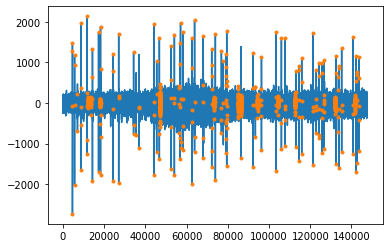

In [29]:
df_diff.plot()
df_diff[df.label == 1].plot(style='.')

<AxesSubplot:>

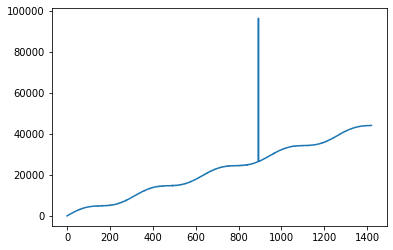

In [30]:
dfg = df_list[69]
dfg.value.plot()

<AxesSubplot:>

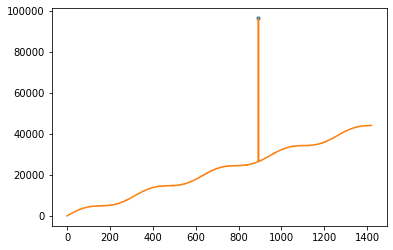

In [31]:
dfg.value[dfg.label == 1].plot(style='.')
dfg.value.plot()

<AxesSubplot:>

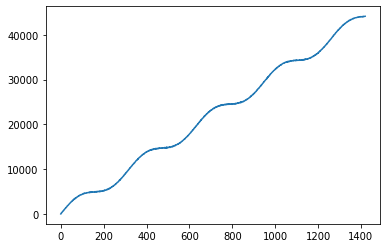

In [32]:
dfg[dfg.value < 80000].value.plot()

### LSTM

In [33]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [74]:
# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
df['ma21'] = df.value.rolling(21).mean()
dataframe = df[['value', 'ma21']]
dataframe = dataframe.dropna()

dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[1860.    , 1887.5238],
       [1864.    , 1888.7142],
       [1841.    , 1888.6666],
       ...,
       [1497.    , 1547.381 ],
       [1532.    , 1545.6666],
       [1587.    , 1543.3334]], dtype=float32)

In [76]:
dataset.reshape(1,-1)

array([[1860.    , 1887.5238, 1864.    , ..., 1545.6666, 1587.    ,
        1543.3334]], dtype=float32)

In [77]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

In [78]:
dataset = scaler.fit_transform(dataset.reshape(-1,1))

In [79]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [80]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [81]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [86]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 197846
  y sizes: 1
Make sure all arrays contain the same number of samples.

In [84]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3046/3046 [==============================] - 3s 1ms/step


In [85]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: Found array with dim 3. None expected <= 2.

In [83]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()